<div class="alert alert-block alert-success">
    
    
# <center> Project Phase 4 </center>


<br>
    
</div>


<div class="alert alert-info">

## <center> Requirements </center>


</div>


In [172]:
import os
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt 
from matplotlib import patches
import seaborn as sns

import pystan
import prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.plot import plot_plotly, plot_components_plotly

In [2]:
os.chdir('./data')

In [173]:
df = pd.read_csv('Transactions.csv')

In [174]:
purchases = pd.read_csv('PurchasesLog.csv')

In [175]:
# Conversions to datetime dtypes

purchases['PurchaseDate'] = pd.to_datetime(purchases['PurchaseDate'])
purchases['DeliveryDate'] = pd.to_datetime(purchases['DeliveryDate'])

purchases['PurchaseDate_Year'] = purchases['PurchaseDate'].dt.year
purchases['PurchaseDate_Month'] = purchases['PurchaseDate'].dt.month
purchases['PurchaseDate_Day'] = purchases['PurchaseDate'].dt.day
purchases['PurchaseDate_Week_of_Year'] = purchases['PurchaseDate'].dt.isocalendar().week
purchases['PurchaseDate_Day_of_Week'] = purchases['PurchaseDate'].dt.dayofweek

purchases['DeliveryDate_Year'] = purchases['DeliveryDate'].dt.year
purchases['DeliveryDate_Month'] = purchases['DeliveryDate'].dt.month
purchases['DeliveryDate_Day'] = purchases['DeliveryDate'].dt.day
purchases['DeliveryDate_Week_of_Year'] = purchases['DeliveryDate'].dt.isocalendar().week
purchases['DeliveryDate_Day_of_Week'] = purchases['DeliveryDate'].dt.dayofweek

/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [176]:
# Conversions to datetime dtypes

df['Expected_Delivery_Date'] = pd.to_datetime(df['Expected_Delivery_Date'])
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Actual_Delivery_Date'] = pd.to_datetime(df['Actual_Delivery_Date'])

df['Expected_Delivery_Year'] = df['Expected_Delivery_Date'].dt.year
df['Expected_Delivery_Month'] = df['Expected_Delivery_Date'].dt.month
df['Expected_Delivery_Day'] = df['Expected_Delivery_Date'].dt.day
df['Expected_Delivery_Week_of_Year'] = df['Expected_Delivery_Date'].dt.isocalendar().week
df['Expected_Delivery_Day_of_Week'] = df['Expected_Delivery_Date'].dt.dayofweek

df['Order_Date_Year'] = df['Order_Date'].dt.year
df['Order_Date_Month'] = df['Order_Date'].dt.month
df['Order_Date_Day'] = df['Order_Date'].dt.day
df['Order_Date_Week_of_Year'] = df['Order_Date'].dt.isocalendar().week
df['Order_Date_Day_of_Week'] = df['Order_Date'].dt.dayofweek

df['Actual_Delivery_Year'] = df['Actual_Delivery_Date'].dt.year
df['Actual_Delivery_Month'] = df['Actual_Delivery_Date'].dt.month
df['Actual_Delivery_Day'] = df['Actual_Delivery_Date'].dt.day
df['Actual_Delivery_Week_of_Year'] = df['Actual_Delivery_Date'].dt.isocalendar().week
df['Actual_Delivery_Day_of_Week'] = df['Actual_Delivery_Date'].dt.dayofweek

In [177]:
# Import supply chain information
distribution_temp = pd.read_csv('onMartSuperStore_distributionCenter_SHIPS_TO_zip_code_relationships.csv')
distribution_subset = distribution_temp[['DistributionCenter_ID', 'Zip']]
warehouse_temp = pd.read_csv('onMartSuperStore_warehouse_SUPPLIES_distributionCenter_relationships.csv')
warehouse_subset = warehouse_temp[['DistributionCenter_ID', 'Warehouse_ID']]
supply_network = pd.merge(warehouse_subset, distribution_subset, how='inner', left_on = 'DistributionCenter_ID', right_on = 'DistributionCenter_ID')

In [178]:
supply_network

DistributionCenter_ID  Warehouse_ID    Zip
0     DistributionCenter_1   Warehouse_1  60651
1     DistributionCenter_1   Warehouse_1  60697
2     DistributionCenter_1   Warehouse_1  60667
3     DistributionCenter_1   Warehouse_1  60694
4     DistributionCenter_1   Warehouse_1  60684
..                     ...           ...    ...
780  DistributionCenter_97  Warehouse_17  30305
781  DistributionCenter_97  Warehouse_17  28511
782  DistributionCenter_97  Warehouse_17  16111
783  DistributionCenter_97  Warehouse_17  50022
784  DistributionCenter_97  Warehouse_17  23303

[785 rows x 3 columns]

### 1. Create Customer-Friends-Product-Reviews graph database for OnMart

**Use PurchasesLog Dataset**


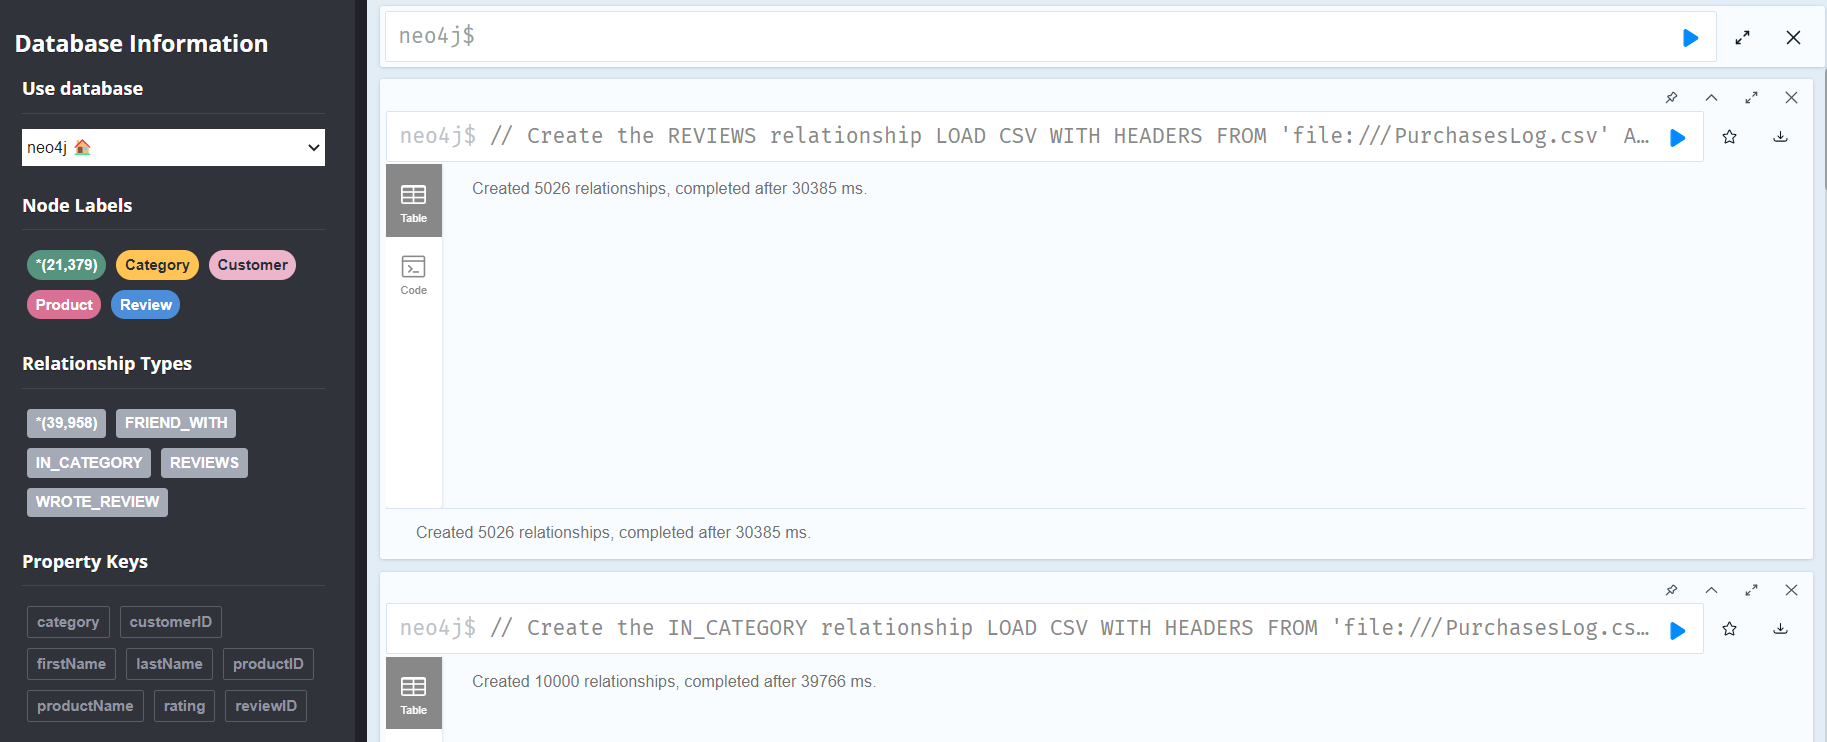

### 2. Use Google PageRank, and the graph database that you created above for customer reviews/ratings to find influential reviewers

**Use PurchasesLog Dataset**


### 3. Use Betweenness Centrality and PageRank algorithms to find which OnMart superstore super-connected and influential reviewers  who can be used  to identify products from the Furniture department that it could use in a cross-promotion with the newly introduced Samsung TV  in the Electronics department
    
**Use PurchasesLog Dataset**


### 4. The day of the week that has the maximum number of purchases made 

/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


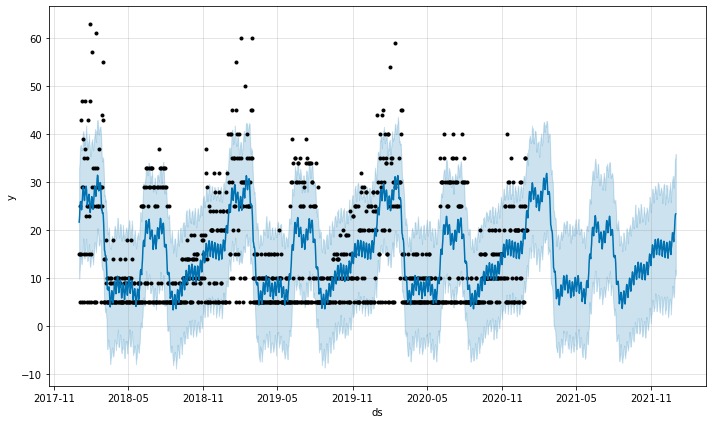

In [179]:
# Forecast out 1 year the number of purchases made on each day. Then use that forecast to predict which day of the week has
# the most purchases

q4 = df.groupby('Order_Date')['CustomerID'].count().reset_index(name='Count')

q4_model_data = q4.rename(columns = {'Order_Date': 'ds',
                                'Count': 'y'})
 
q4_model = Prophet(yearly_seasonality=True, daily_seasonality=True)
q4_model.fit(q4_model_data) 
q4_future_dates = q4_model.make_future_dataframe(periods = 365, freq='d')
q4_forecast = q4_model.predict(q4_future_dates)

q4_model.plot(q4_forecast);




/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


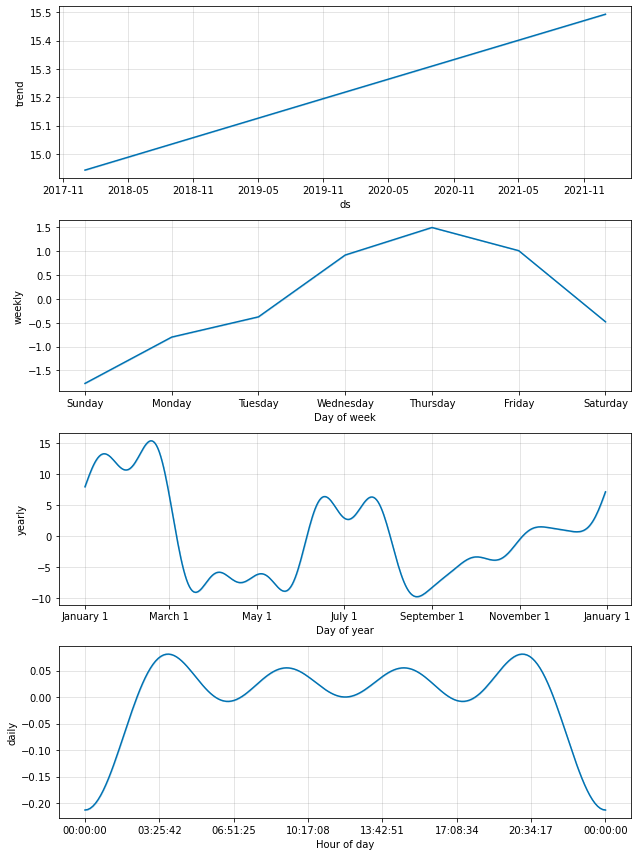

In [180]:
q4_model.plot_components(q4_forecast);

In [181]:
q4_forecast['day_of_week'] = q4_forecast['ds'].dt.dayofweek
q4_result = q4_forecast.groupby('day_of_week')['yhat'].sum().reset_index(name='Count')

In [182]:
# The forecasted day of the week with the most orders is Thursday with ~3452 orders over the course of the forecasted year.
q4_result

day_of_week        Count
0            0  2970.286044
1            1  3059.262335
2            2  3330.611619
3            3  3451.538606
4            4  3350.259595
5            5  3016.182760
6            6  2746.849706

### 5. The month of the year that has the highest sales revenue

In [183]:
# Since PurchasesLog only has one date of purchases, I use the transaction.csv. I use counts of purchases rather than revenue since
# transactions.csv doesn't contain revenue information.

# I forecast 1 year of monthly sales revenue. The forecast then will tell me which month of the year likely has the highest sales revenue.

q5 = df.groupby(['Order_Date_Year', 'Order_Date_Month'])['OrderID'].count().reset_index(name='Count')
q5_weeks = df.groupby(['Order_Date_Year', 'Order_Date_Month'])['Order_Date'].min().reset_index()
q5_data = pd.merge(q5, q5_weeks, how='left', on = ['Order_Date_Year', 'Order_Date_Month'])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_com

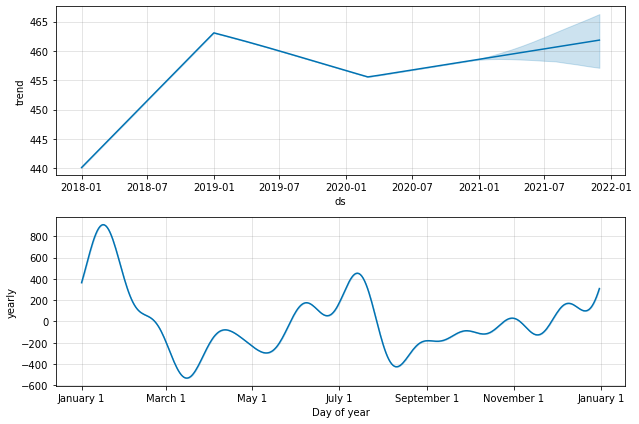

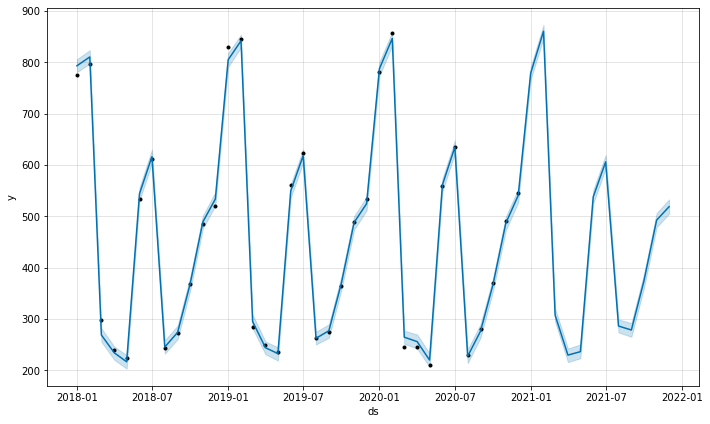

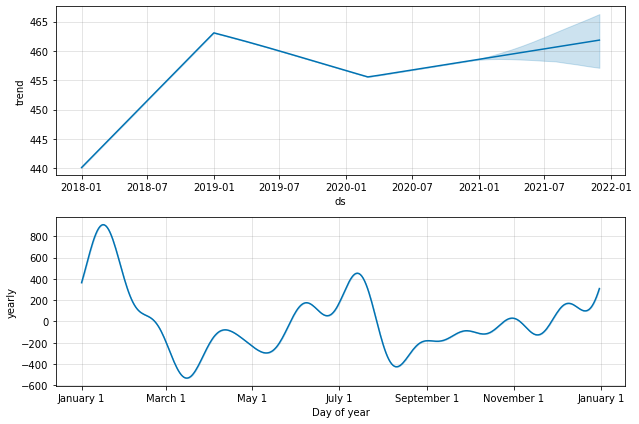

In [184]:
q5_model_data = q5_data[['Order_Date', 'Count']].rename(columns = {'Order_Date': 'ds', 'Count': 'y'})
 
q5_model = Prophet(yearly_seasonality=True)
q5_model.fit(q5_model_data) 
q5_future_dates = q5_model.make_future_dataframe(periods = 12, freq='m')
q5_forecast = q5_model.predict(q5_future_dates)

q5_model.plot(q5_forecast)
q5_model.plot_components(q5_forecast)

In [186]:
# January is forecasted to have the most sales
q5_forecast[['ds', 'yhat']]

ds        yhat
0  2018-01-01  793.033631
1  2018-02-01  810.217723
2  2018-03-01  269.030688
3  2018-04-01  234.481001
4  2018-05-01  216.848244
5  2018-06-01  544.071743
6  2018-07-01  616.117025
7  2018-08-01  245.592638
8  2018-09-01  274.165877
9  2018-10-01  367.759538
10 2018-11-01  489.249565
11 2018-12-01  533.645191
12 2019-01-01  804.762846
13 2019-02-01  841.655517
14 2019-03-01  295.153596
15 2019-04-01  244.305149
16 2019-05-01  232.793568
17 2019-06-01  549.583558
18 2019-07-01  618.144827
19 2019-08-01  262.608435
20 2019-09-01  277.376557
21 2019-10-01  369.273587
22 2019-11-01  488.277654
23 2019-12-01  524.570321
24 2020-01-01  787.308324
25 2020-02-01  846.257170
26 2020-03-01  264.789361
27 2020-04-01  256.183097
28 2020-05-01  220.264851
29 2020-06-01  561.261073
30 2020-07-01  634.652769
31 2020-08-01  227.729042
32 2020-09-01  276.414492
33 2020-10-01  366.985090
34 2020-11-01  486.524637
35 2020-12-01  540.863425
36 2020-12-31  778.364855
37 2021-01-31  860.245227
38 2021-02-28  307.602648
39 2021-03-31  229.908008
40 2021-04-30  236.605971
41 2021-05-31  537.912392
42 2021-06-30  606.022119
43 2021-07-31  286.485078
44 2021-08-31  278.733341
45 2021-09-30  372.987056
46 2021-10-31  492.670834
47 2021-11-30  518.690734

### 6. The weekly sales revenue forecast per zip-code

In [187]:
# Since the PurchaseLog.csv file only has purchases from a single day, I forecast the weekly number of purchases per zipcode using the transactions.csv file
q6 = df.groupby(['Delivery_Zip_Code', 'Order_Date_Year', 'Order_Date_Week_of_Year'])['OrderID'].count().reset_index(name='Count')
q6_weeks = df.groupby(['Order_Date_Year', 'Order_Date_Week_of_Year'])['Order_Date'].min().reset_index()
q6_data = pd.merge(q6, q6_weeks, how='left', on = ['Order_Date_Year', 'Order_Date_Week_of_Year'])

In [188]:
q6_data

Delivery_Zip_Code  Order_Date_Year  Order_Date_Week_of_Year  Count  \
0                 10048             2018                        1      1   
1                 10048             2018                        2      2   
2                 10048             2018                        3      6   
3                 10048             2018                        4      8   
4                 10048             2018                        5      2   
...                 ...              ...                      ...    ...   
5838              90774             2020                       49      1   
5839              90774             2020                       50      3   
5840              90774             2020                       51      2   
5841              90774             2020                       52      2   
5842              90774             2020                       53      3   

     Order_Date  
0    2018-01-01  
1    2018-01-08  
2    2018-01-15  
3    2018-01-22  
4    2018-01-29  
...         ...  
5838 2020-11-30  
5839 2020-12-07  
5840 2020-12-14  
5841 2020-12-21  
5842 2020-12-28  

[5843 rows x 5 columns]

In [189]:
def q6_forecast(df):
    df_temp = df[['Order_Date', 'Count']]

    df_model_data = df.rename(columns = {'Order_Date': 'ds',
                                'Count': 'y'})
 
    df_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
    df_model.fit(df_model_data) 
    df_future_dates = df_model.make_future_dataframe(periods = 52, freq='w')
    df_forecast = df_model.predict(df_future_dates)

    df_model.plot(df_forecast);
    
    forecast = df_forecast[['ds', 'yhat']]
    
    return forecast

/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_29412/2273509535.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  q6_forecasted_values.appen

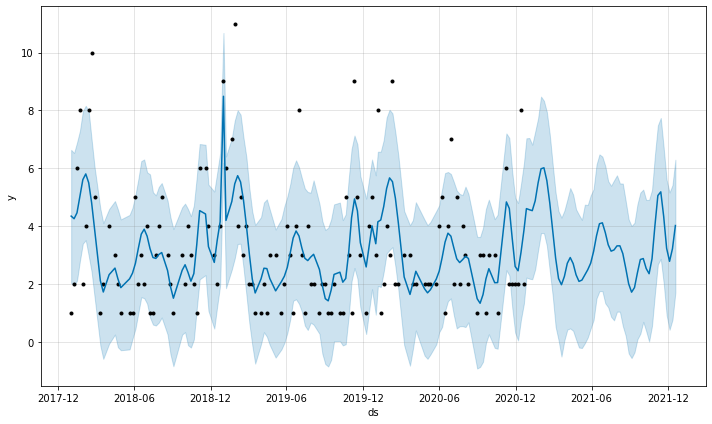

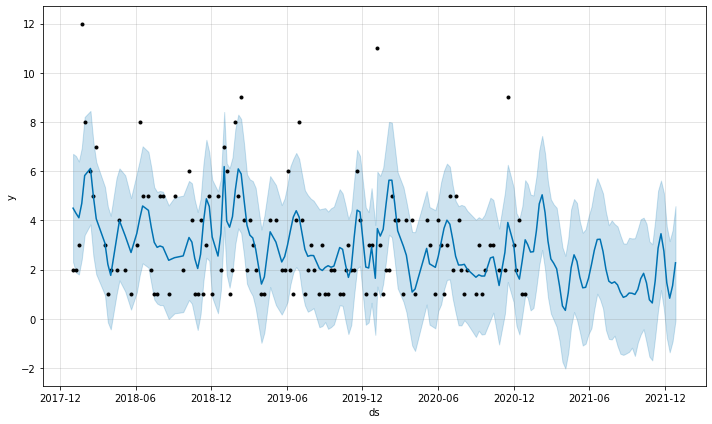

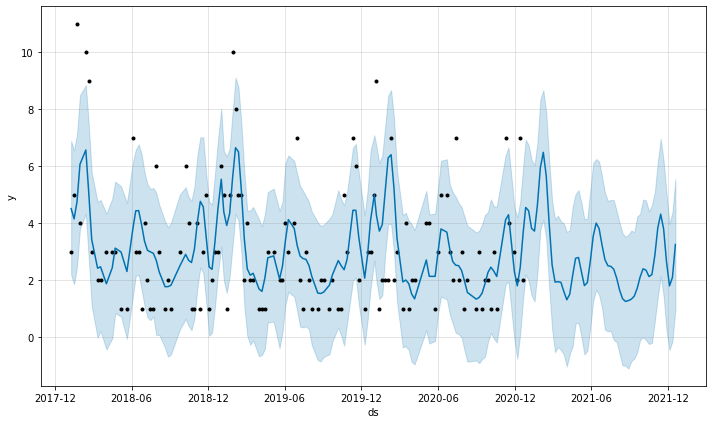

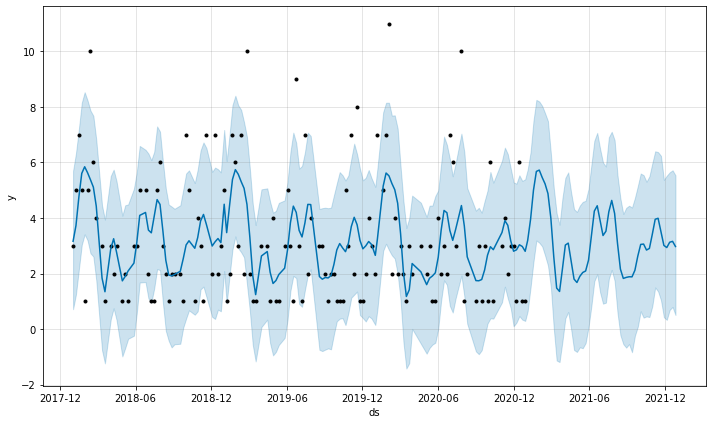

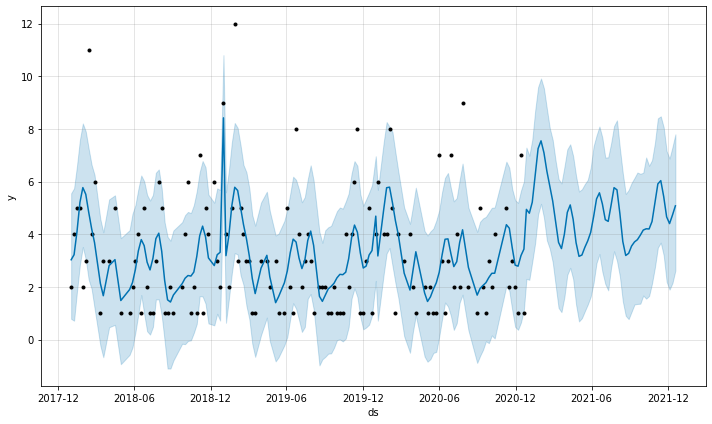

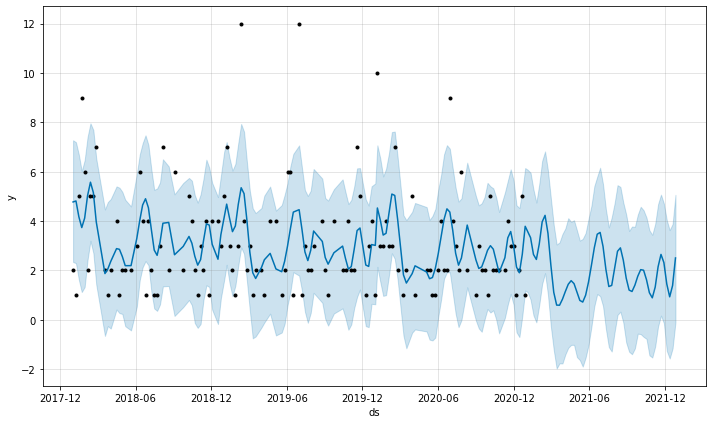

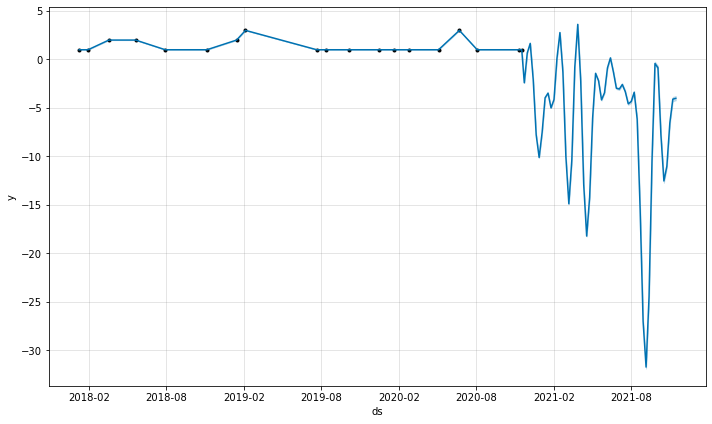

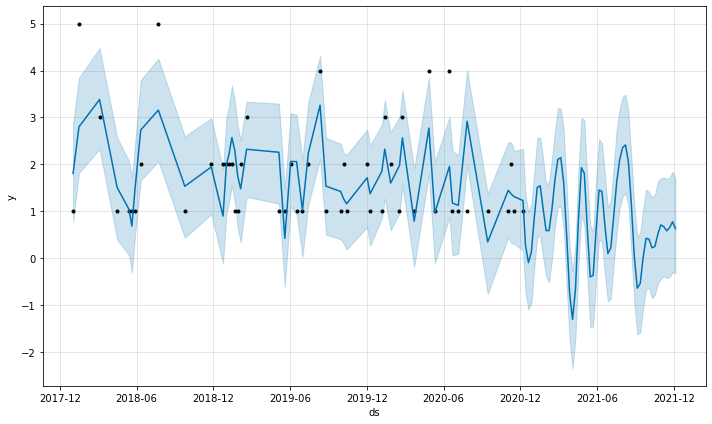

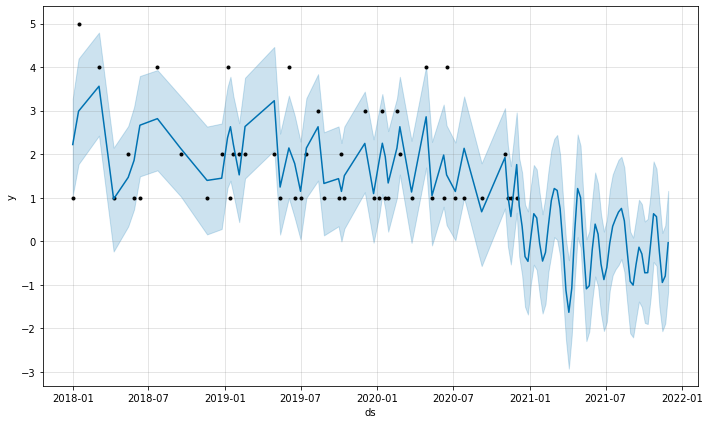

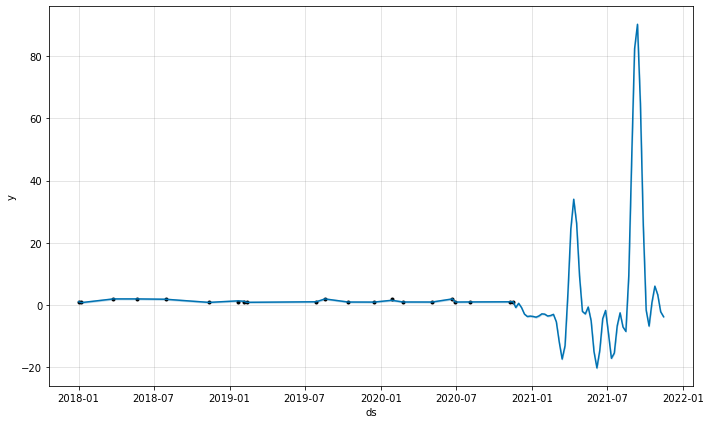

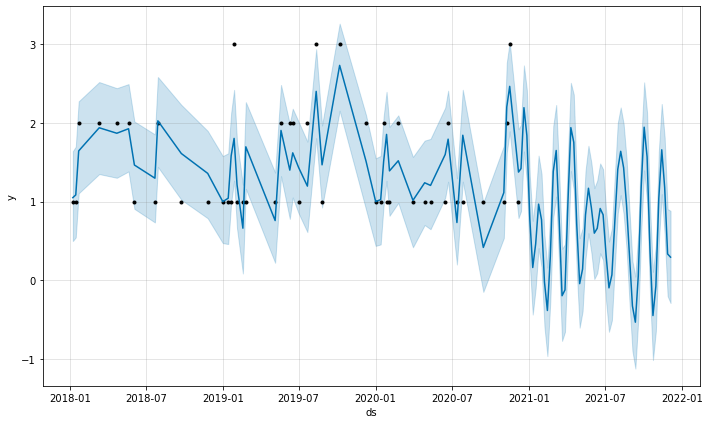

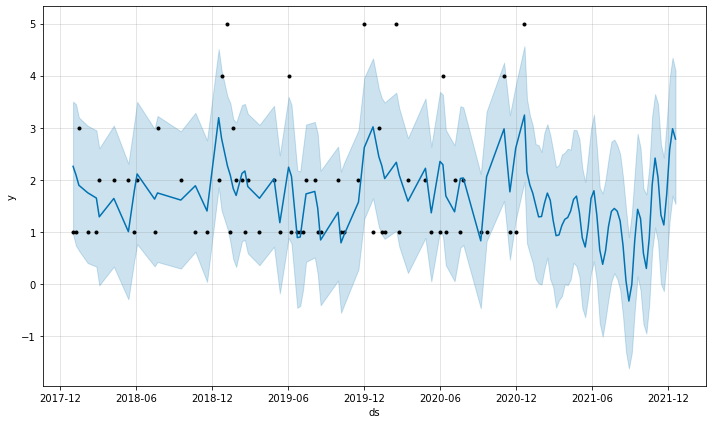

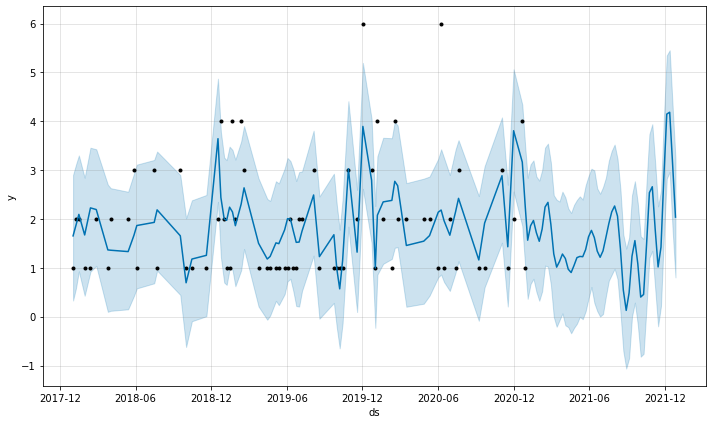

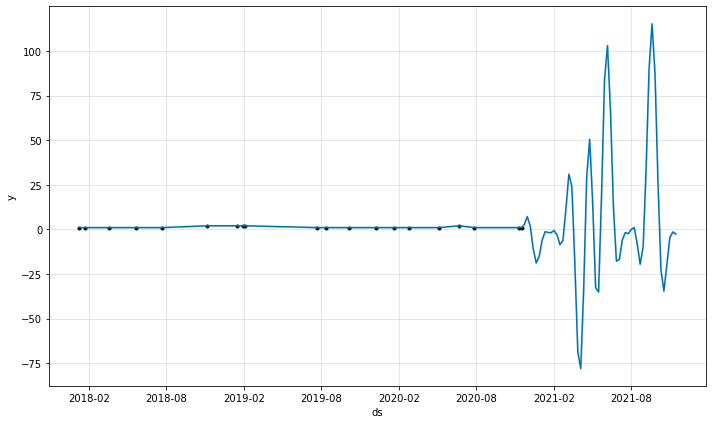

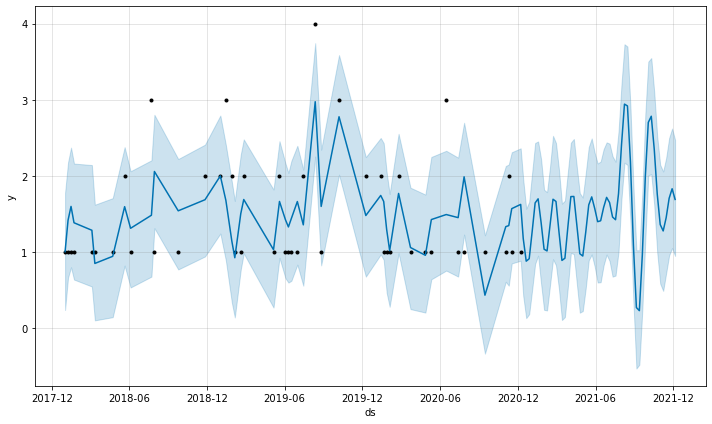

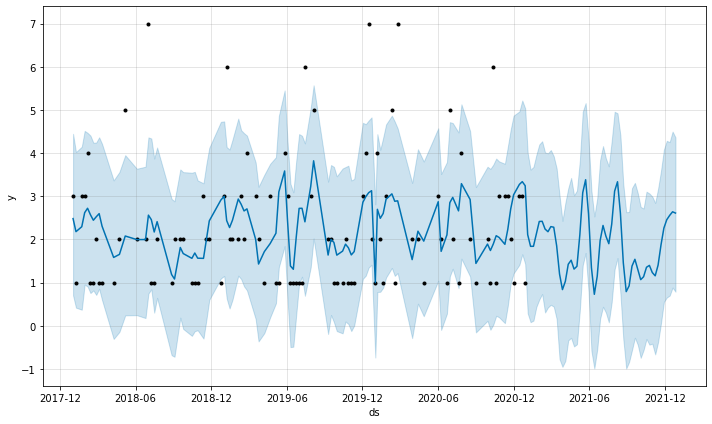

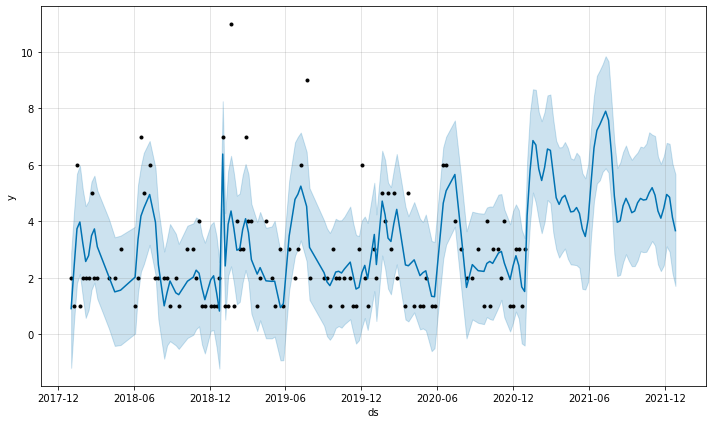

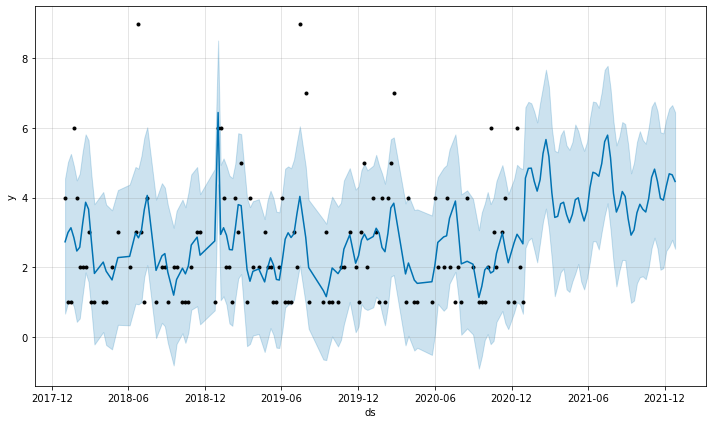

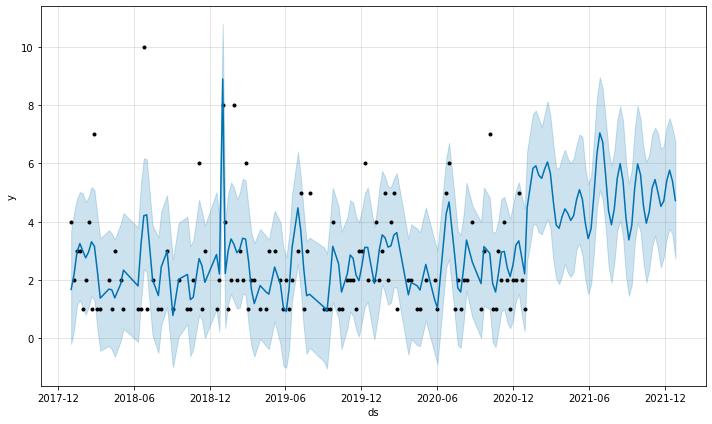

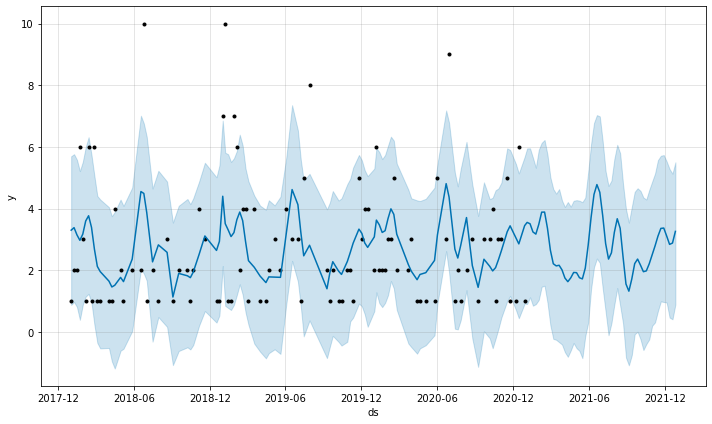

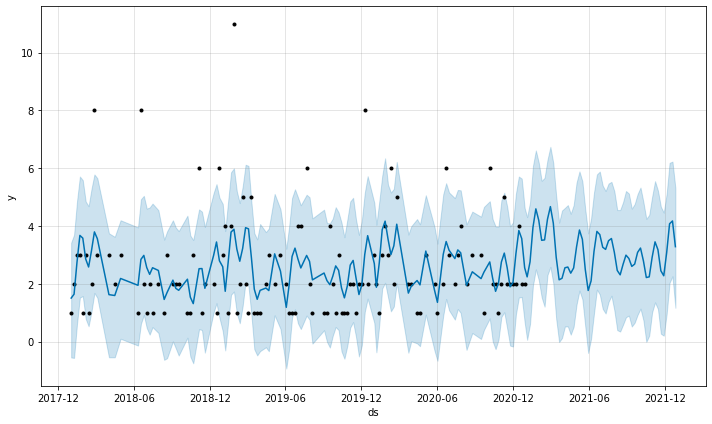

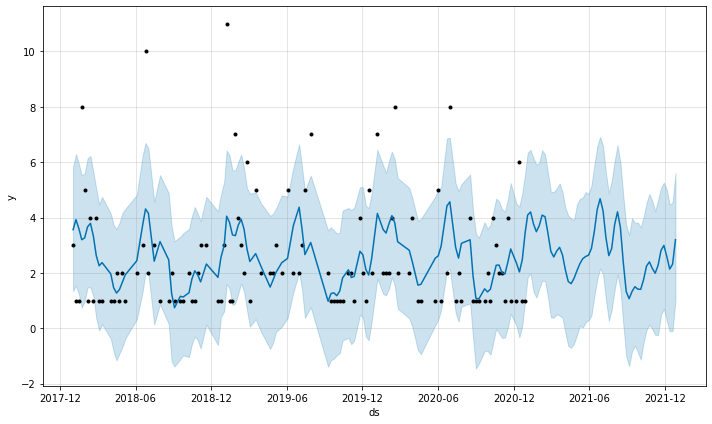

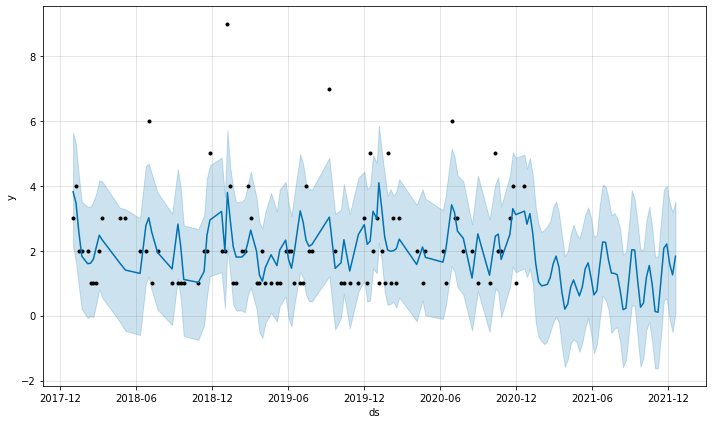

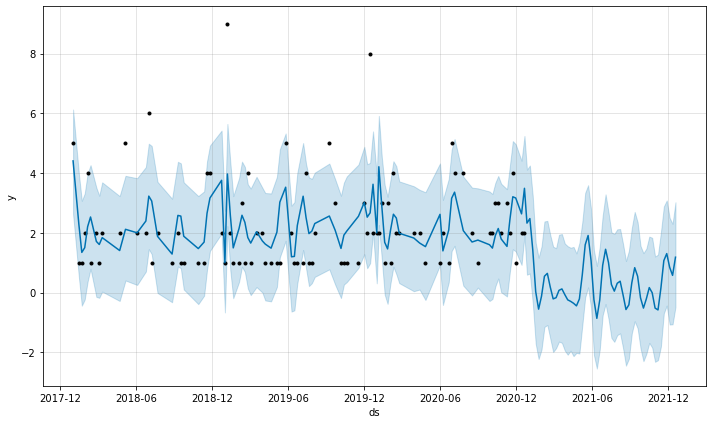

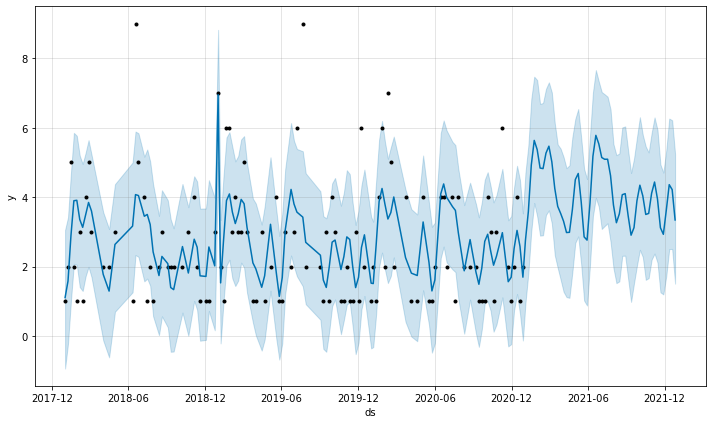

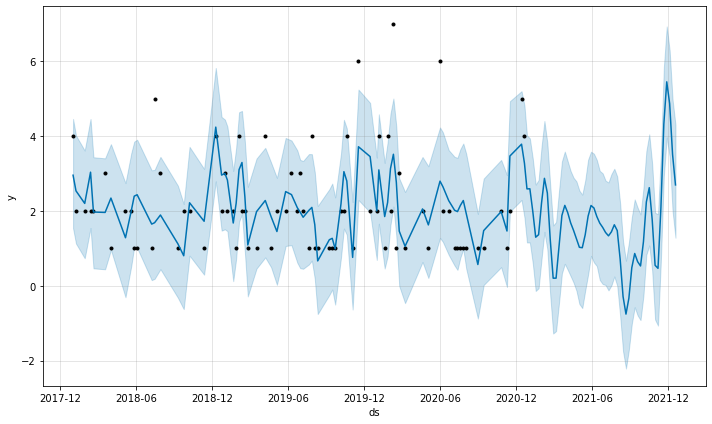

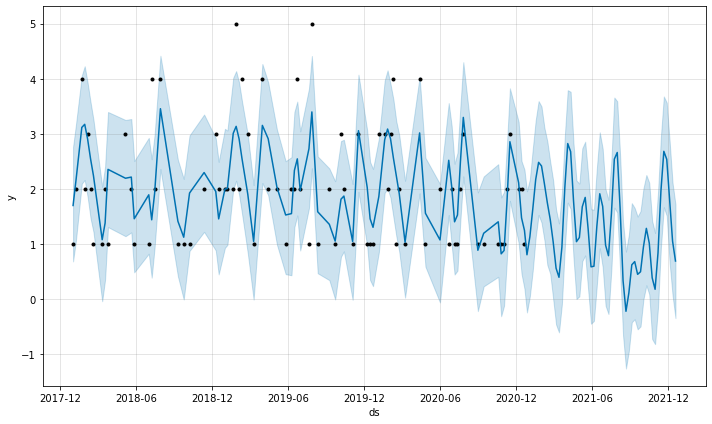

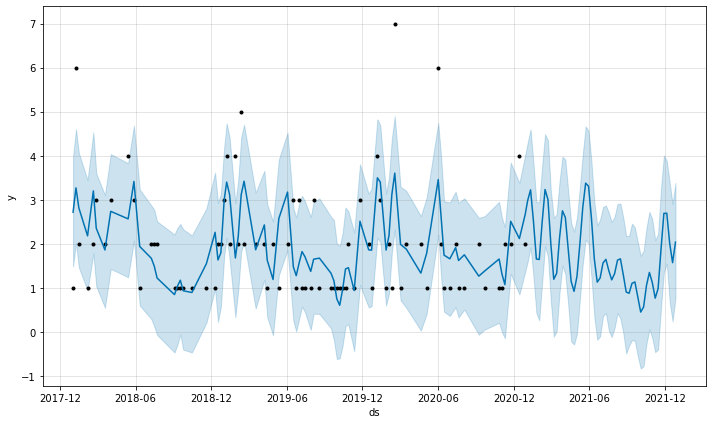

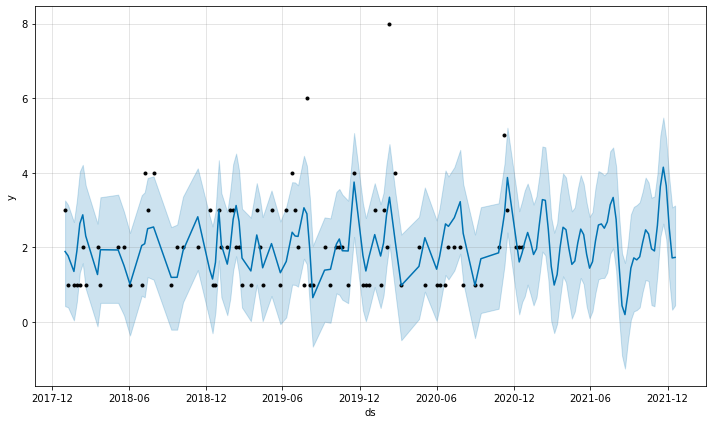

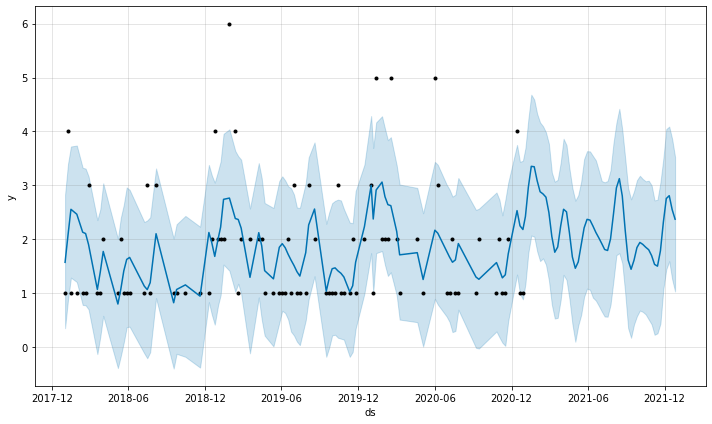

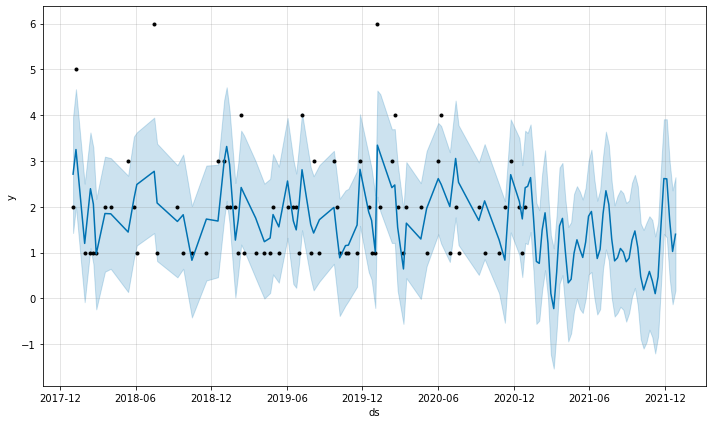

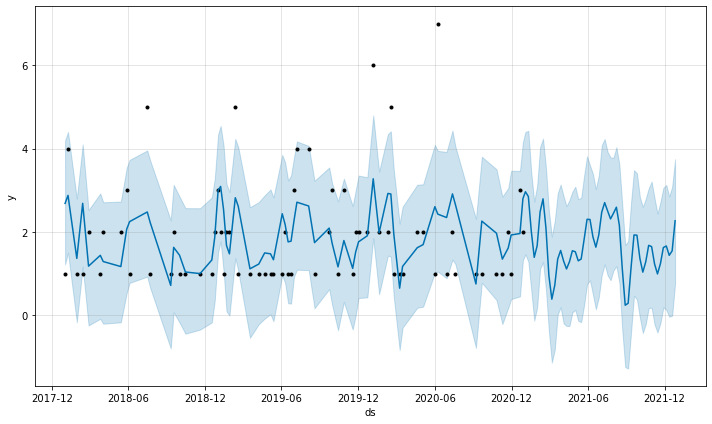

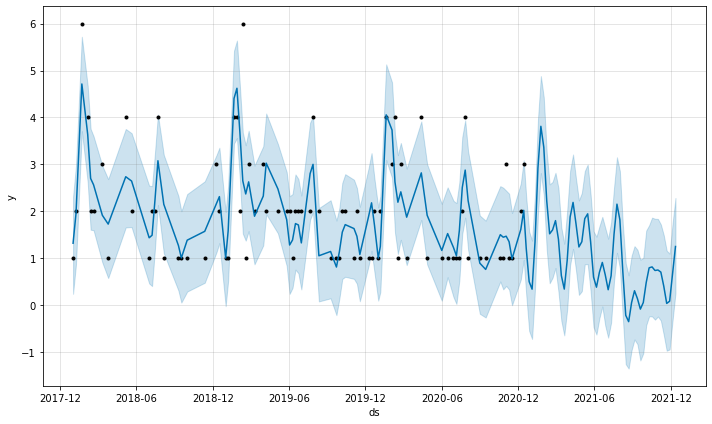

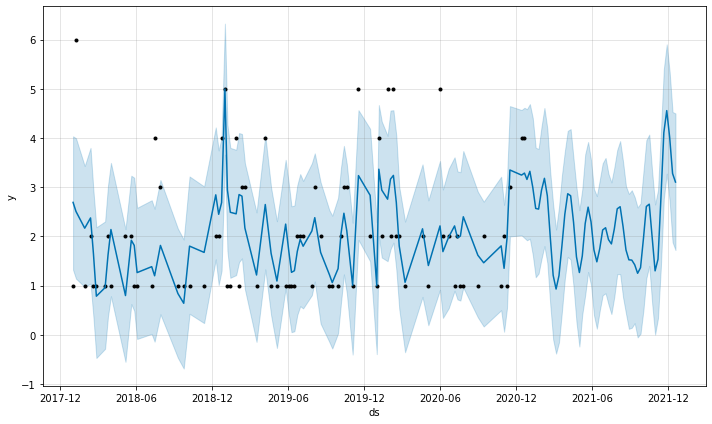

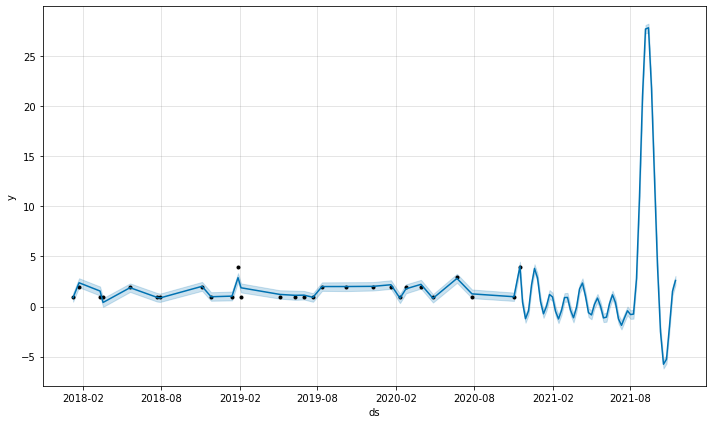

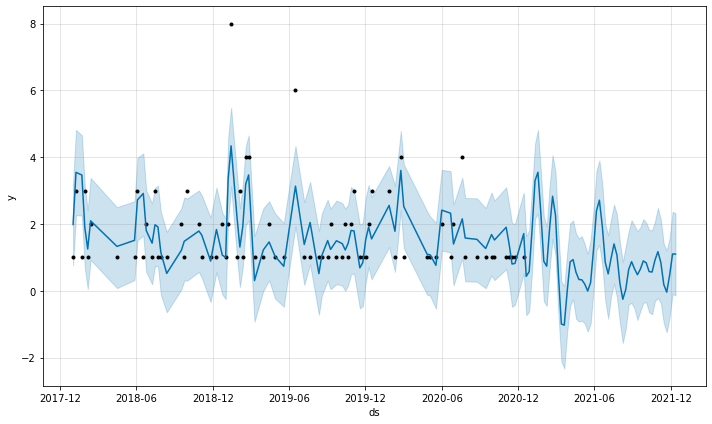

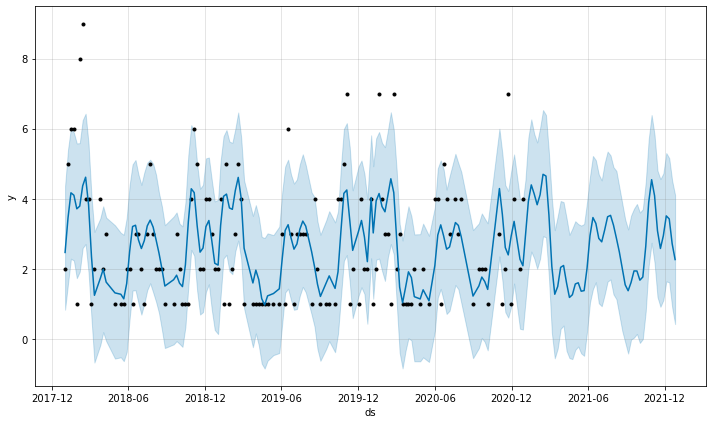

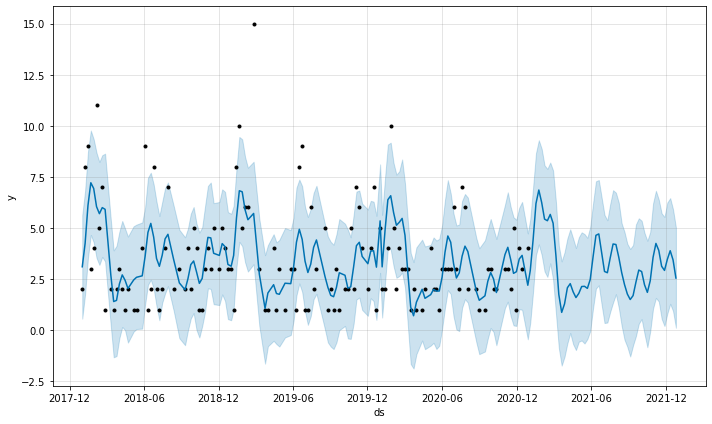

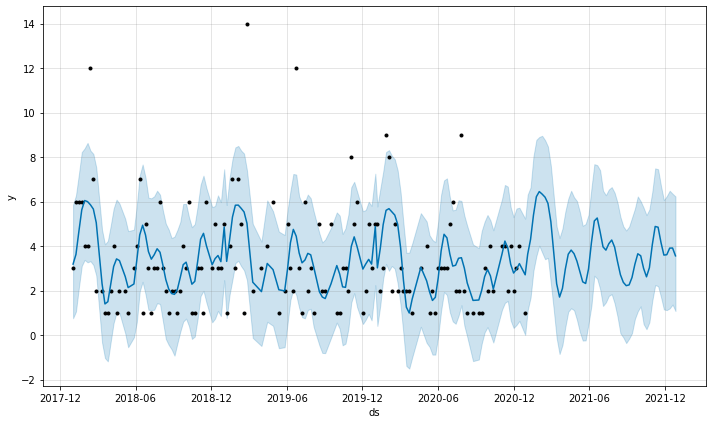

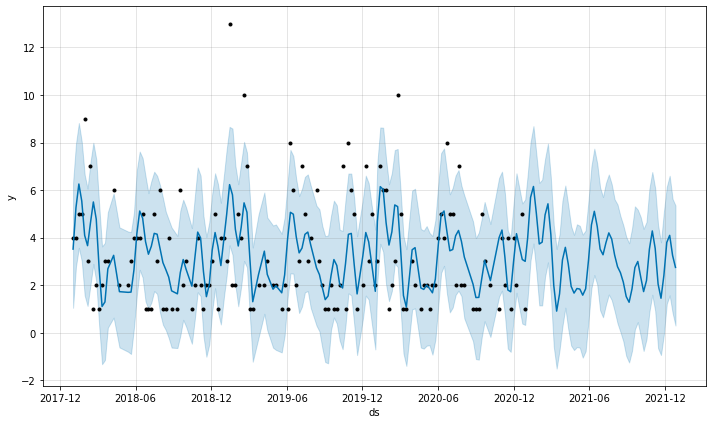

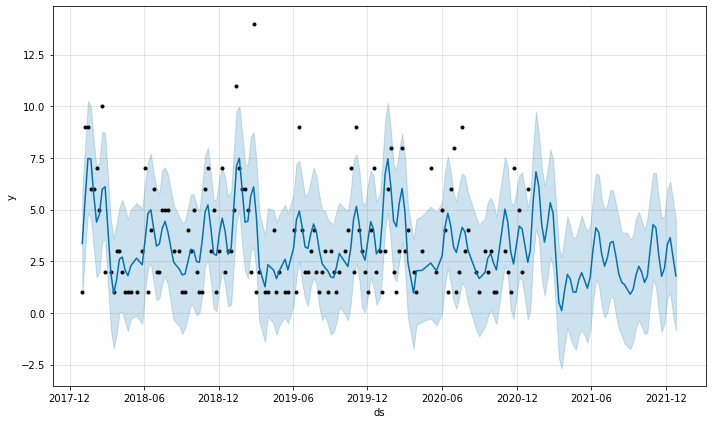

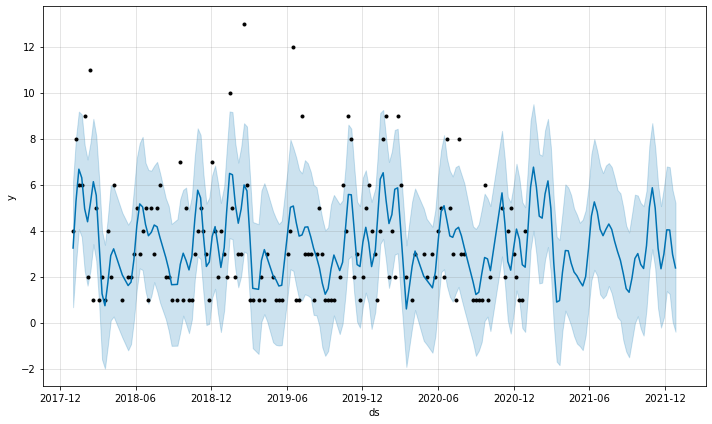

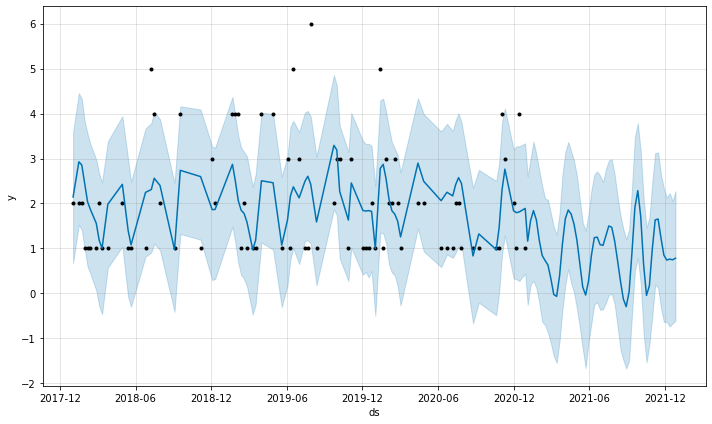

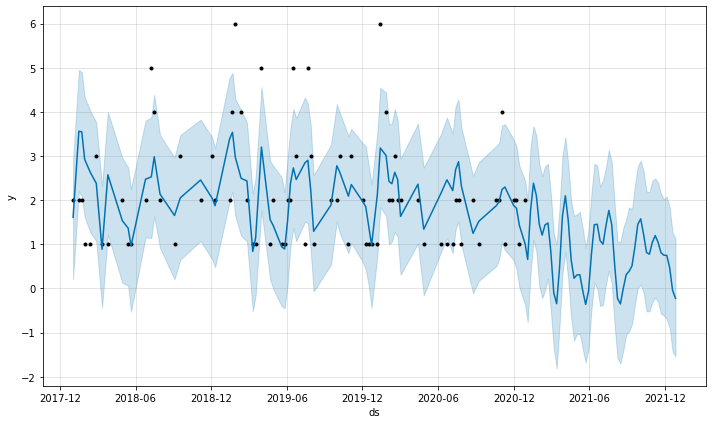

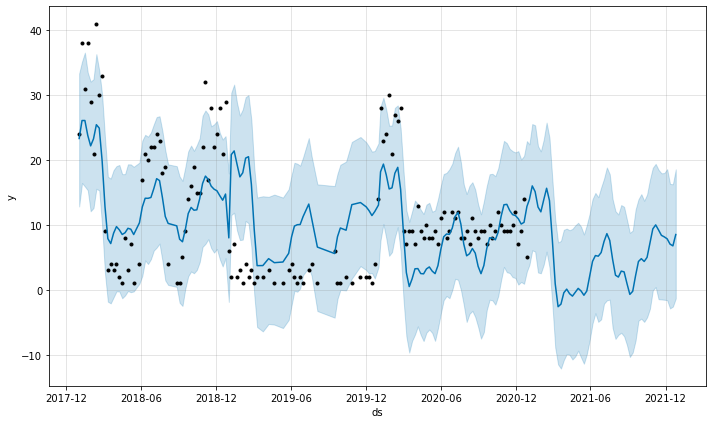

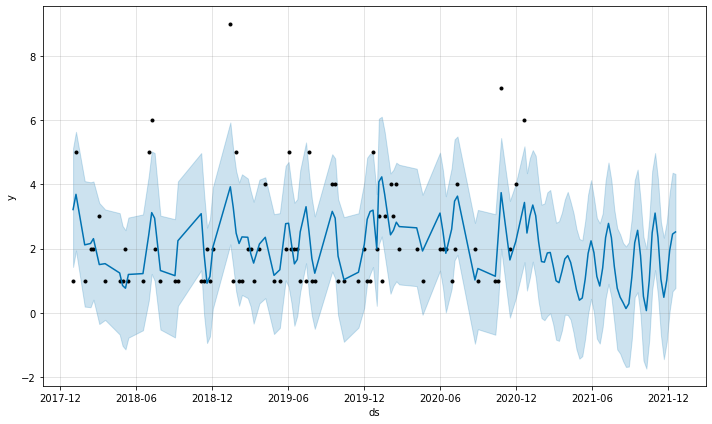

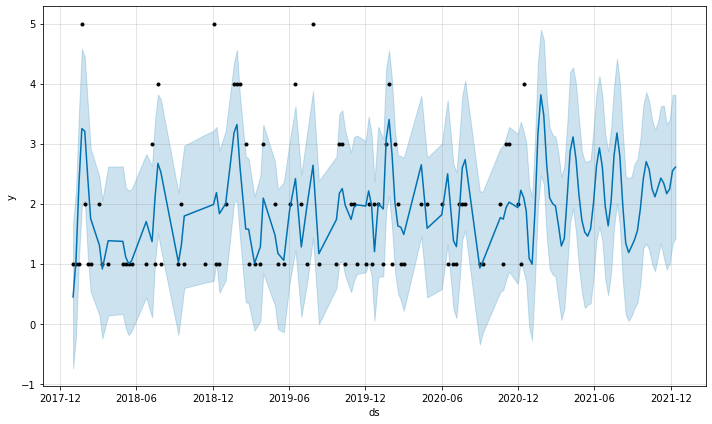

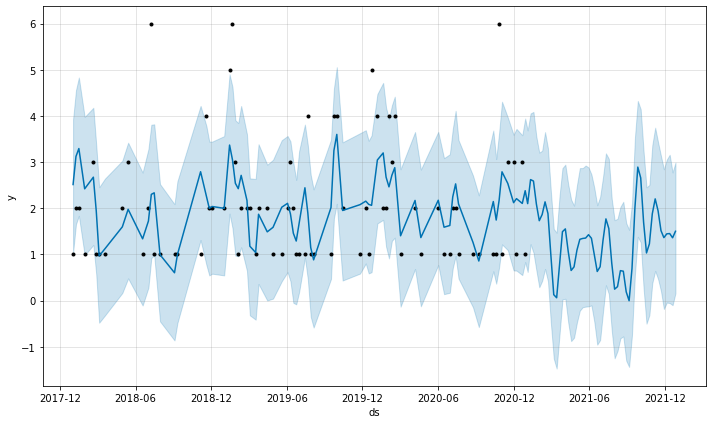

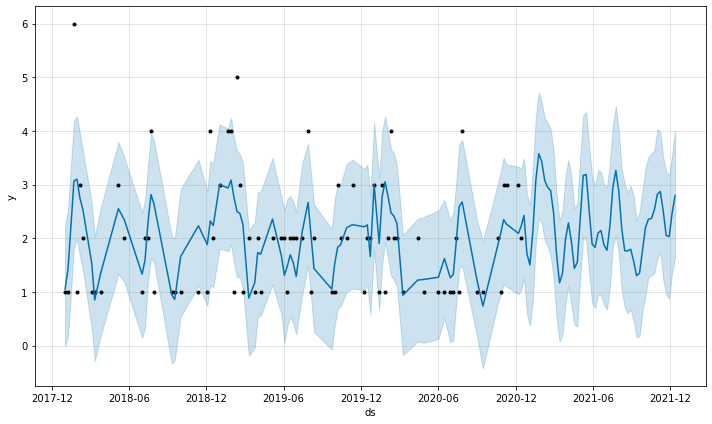

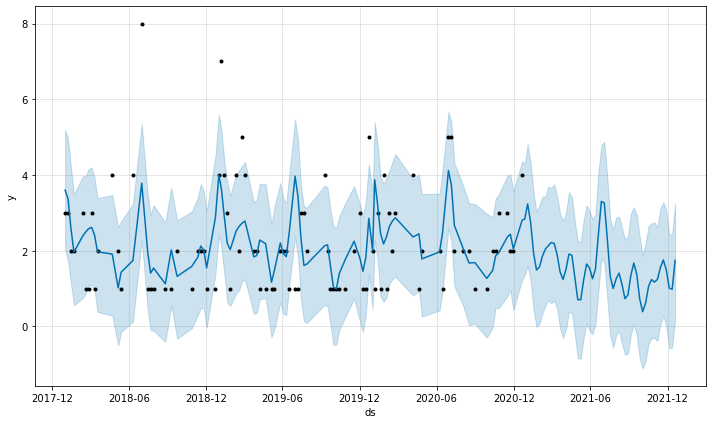

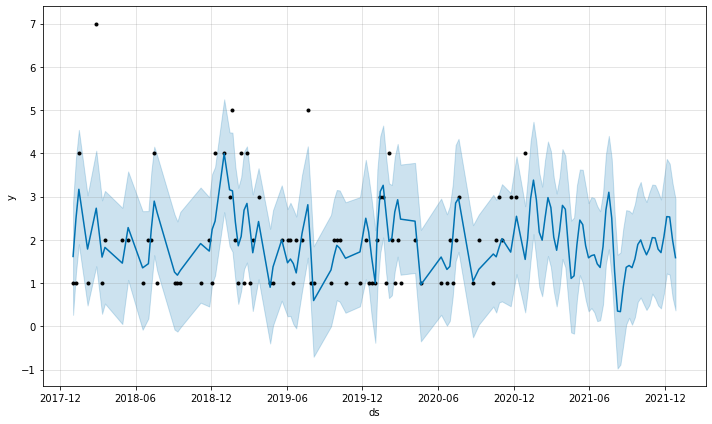

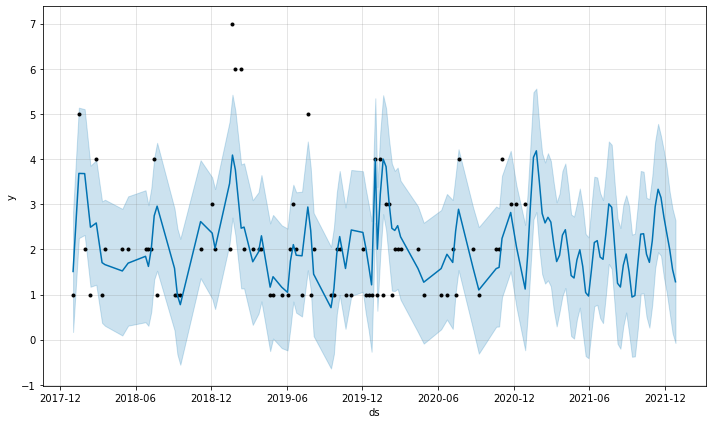

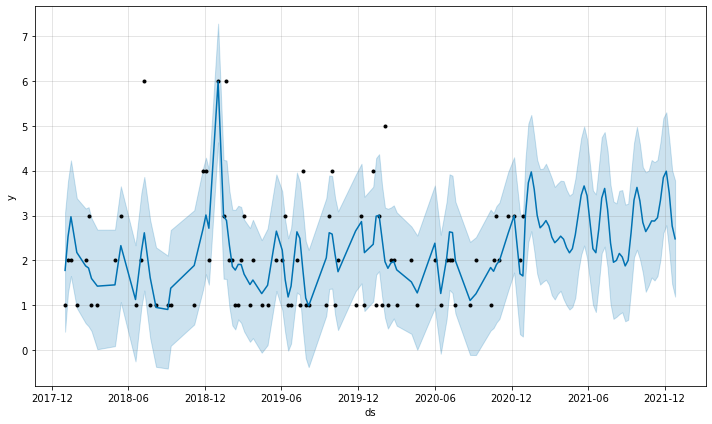

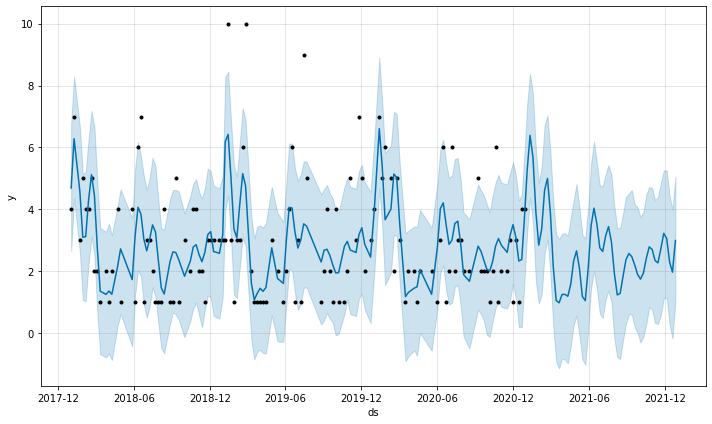

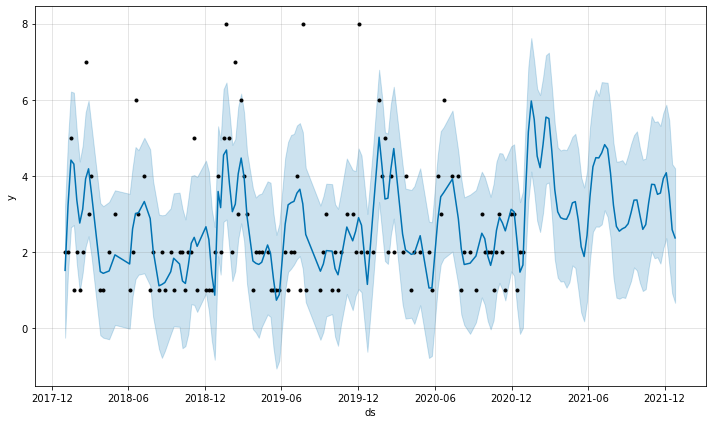

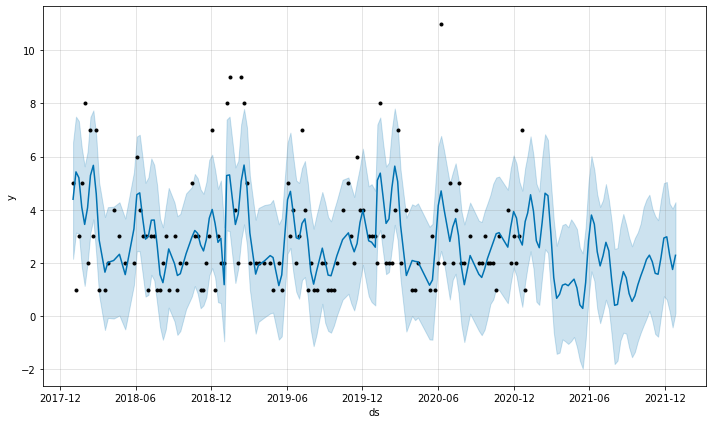

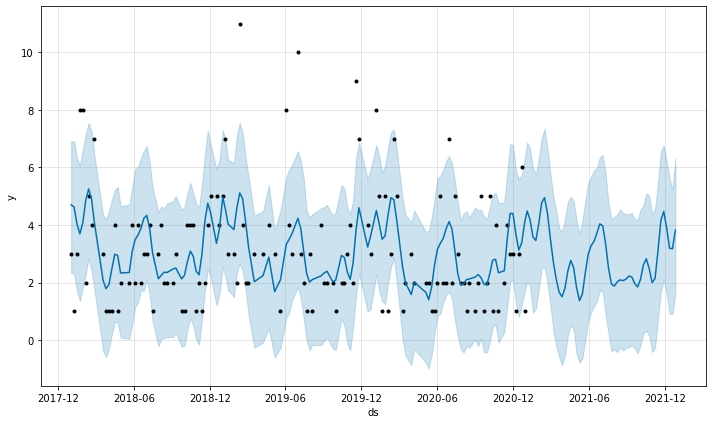

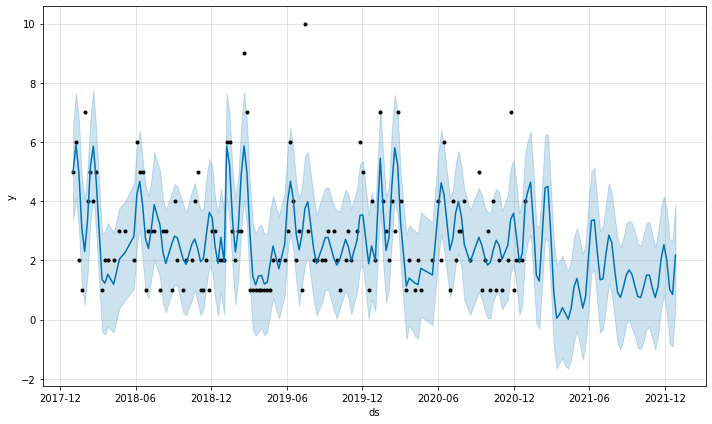

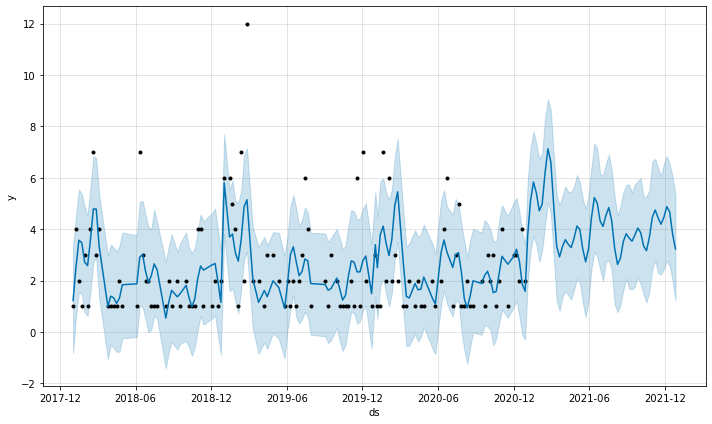

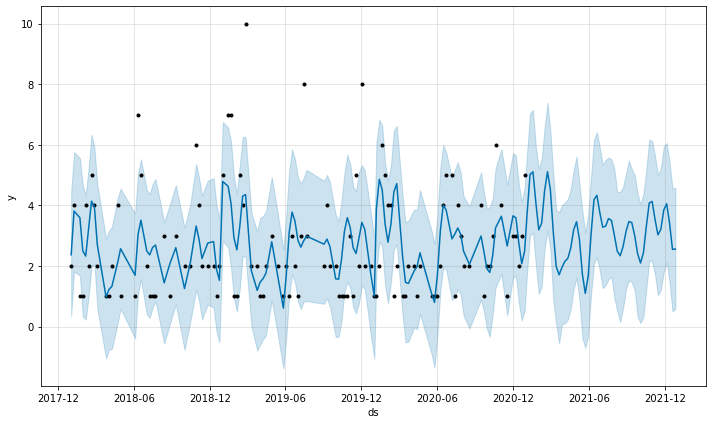

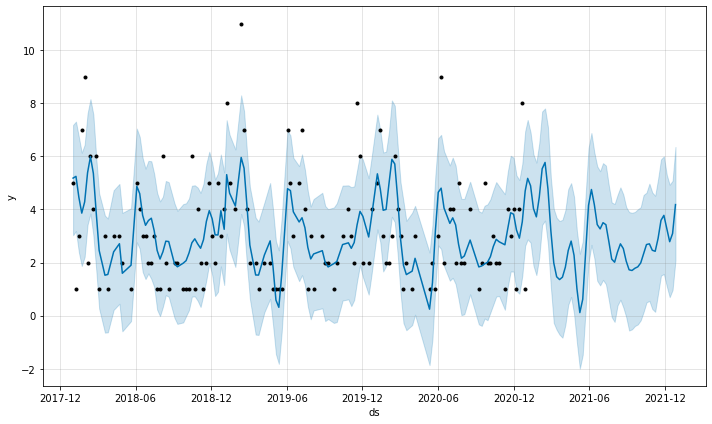

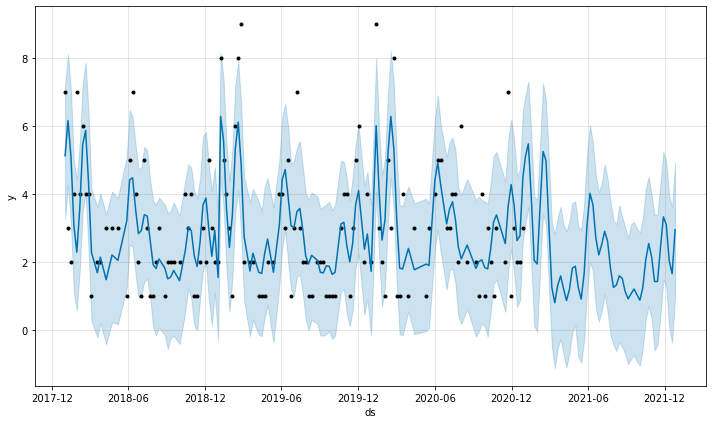

In [190]:
q6_forecasted_values = pd.DataFrame()

for i in q6_data['Delivery_Zip_Code'].unique():
    temp = q6_data[q6_data['Delivery_Zip_Code'] == i]
    temp_forecast = q6_forecast(temp)
    temp_forecast['Zip'] = i
    q6_forecasted_values.append(temp_forecast)


### 7. The daily number of purchases forecast per distribution center


In [191]:
q7 = pd.merge(df, supply_network, how='left', left_on = 'Delivery_Zip_Code', right_on = 'Zip')

In [192]:
q7_grouped = q7.groupby(['Order_Date', 'DistributionCenter_ID'])['OrderID'].count().reset_index(name='Count')

In [193]:
def q7_forecast(df):
    df_temp = df[['Order_Date', 'Count']]

    df_model_data = df.rename(columns = {'Order_Date': 'ds',
                                'Count': 'y'})
 
    df_model = Prophet(yearly_seasonality=True, daily_seasonality=True)
    df_model.fit(df_model_data) 
    df_future_dates = df_model.make_future_dataframe(periods = 365, freq='d')
    df_forecast = df_model.predict(df_future_dates)

    df_model.plot(df_forecast);
    
    forecast = df_forecast[['ds', 'yhat']]
    forecast_avg = df_forecast['yhat'].mean()
    
    return forecast, forecast_avg

In [194]:
q7_grouped['DistributionCenter_ID'].unique()

array(['DistributionCenter_14', 'DistributionCenter_2',
       'DistributionCenter_37', 'DistributionCenter_38',
       'DistributionCenter_51', 'DistributionCenter_65',
       'DistributionCenter_66', 'DistributionCenter_85',
       'DistributionCenter_50', 'DistributionCenter_86',
       'DistributionCenter_93', 'DistributionCenter_13',
       'DistributionCenter_84'], dtype=object)

/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


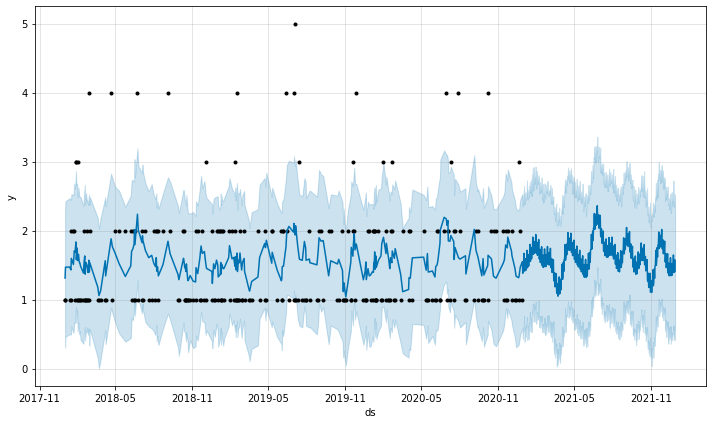

In [195]:
q7_dist_center_14, q7_dist_center_14_avg = q7_forecast(q7_grouped[q7_grouped['DistributionCenter_ID'] == 'DistributionCenter_14'])

In [196]:
print('Forecasted Average Daily Orders for Distribution Center {0}: {1}'.format('14', q7_dist_center_14_avg))
print('Forecasted Daily Orders for Distribution Center {0}:\n {1}'.format(14, q7_dist_center_14))

Forecasted Average Daily Orders for Distribution Center 14: 1.5983598454148011
Forecasted Daily Orders for Distribution Center 14:
             ds      yhat
0   2018-01-01  1.312557
1   2018-01-02  1.471227
2   2018-01-12  1.471992
3   2018-01-15  1.430620
4   2018-01-16  1.598511
..         ...       ...
614 2021-12-25  1.647376
615 2021-12-26  1.394022
616 2021-12-27  1.416688
617 2021-12-28  1.577403
618 2021-12-29  1.408993

[619 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


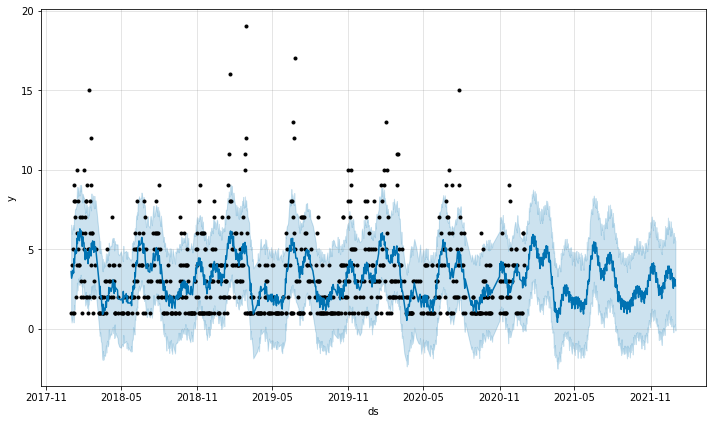

In [197]:
q7_dist_center_2, q7_dist_center_2_avg = q7_forecast(q7_grouped[q7_grouped['DistributionCenter_ID'] == 'DistributionCenter_2'])

In [198]:
print('Forecasted Average Daily Orders for Distribution Center {0}: {1}'.format(2, q7_dist_center_2_avg))
print('Forecasted Daily Orders for Distribution Center {0}:\n {1}'.format(2, q7_dist_center_2))

Forecasted Average Daily Orders for Distribution Center 2: 3.1955975818056954
Forecasted Daily Orders for Distribution Center 2:
              ds      yhat
0    2018-01-01  3.585937
1    2018-01-02  3.165063
2    2018-01-05  3.502569
3    2018-01-06  3.684300
4    2018-01-07  3.497346
...         ...       ...
1170 2021-12-27  3.197114
1171 2021-12-28  2.674921
1172 2021-12-29  2.963929
1173 2021-12-30  3.089763
1174 2021-12-31  2.685273

[1175 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


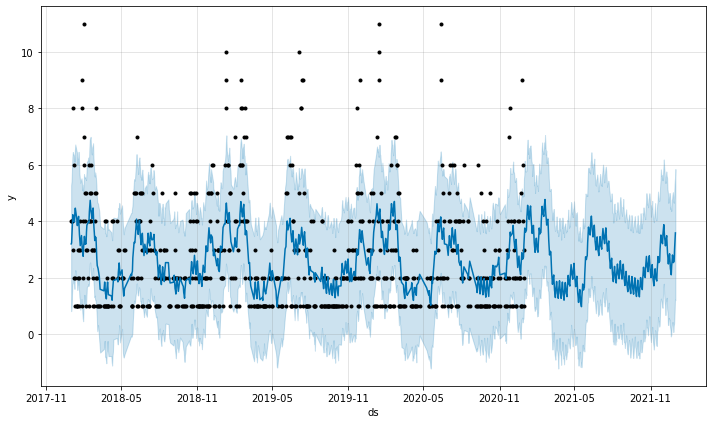

In [199]:
q7_dist_center_37, q7_dist_center_37_avg = q7_forecast(q7_grouped[q7_grouped['DistributionCenter_ID'] == 'DistributionCenter_37'])

In [200]:
print('Forecasted Average Daily Orders for Distribution Center {0}: {1}'.format(37, q7_dist_center_37_avg))
print('Forecasted Daily Orders for Distribution Center {0}:\n {1}'.format(37, q7_dist_center_37))

Forecasted Average Daily Orders for Distribution Center 37: 2.669755918145706
Forecasted Daily Orders for Distribution Center 37:
              ds      yhat
0    2018-01-01  3.199959
1    2018-01-02  3.228704
2    2018-01-04  3.936007
3    2018-01-05  4.233421
4    2018-01-06  4.129138
...         ...       ...
1076 2021-12-27  2.574373
1077 2021-12-28  2.575632
1078 2021-12-29  3.011407
1079 2021-12-30  3.273884
1080 2021-12-31  3.590080

[1081 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


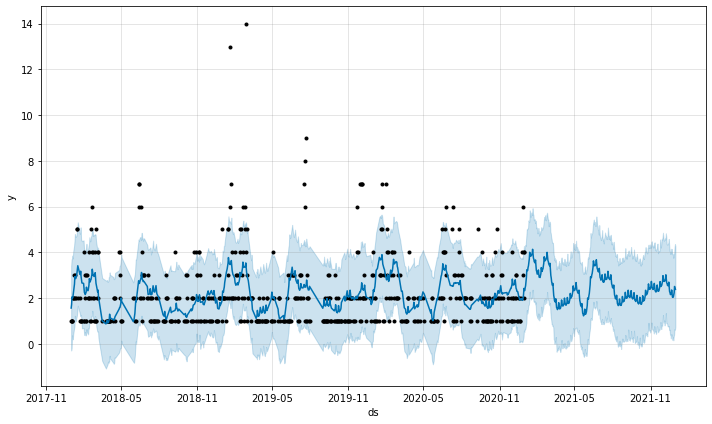

In [201]:
q7_dist_center_38, q7_dist_center_38_avg = q7_forecast(q7_grouped[q7_grouped['DistributionCenter_ID'] == 'DistributionCenter_38'])

In [202]:
print('Forecasted Average Daily Orders for Distribution Center {0}: {1}'.format(38, q7_dist_center_38_avg))
print('Forecasted Daily Orders for Distribution Center {0}:\n {1}'.format(38, q7_dist_center_38))

Forecasted Average Daily Orders for Distribution Center 38: 2.299172623301599
Forecasted Daily Orders for Distribution Center 38:
             ds      yhat
0   2018-01-01  1.560843
1   2018-01-02  1.716890
2   2018-01-03  2.049712
3   2018-01-04  2.008403
4   2018-01-05  2.014973
..         ...       ...
930 2021-12-27  2.135304
931 2021-12-28  2.229228
932 2021-12-29  2.505764
933 2021-12-30  2.415375
934 2021-12-31  2.381288

[935 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


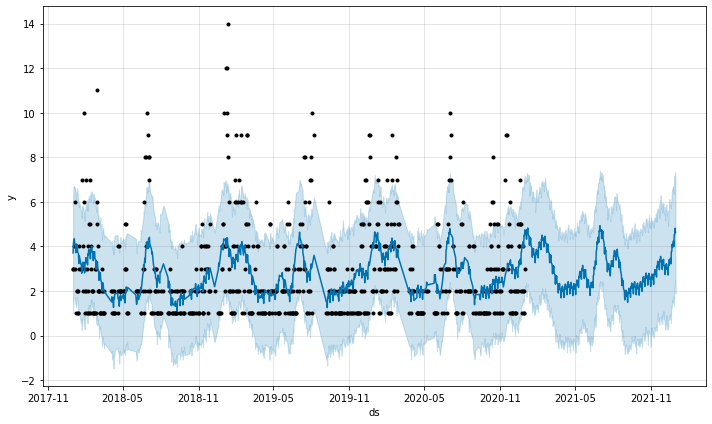

In [203]:
q7_dist_center_51, q7_dist_center_51_avg = q7_forecast(q7_grouped[q7_grouped['DistributionCenter_ID'] == 'DistributionCenter_51'])

In [204]:
print('Forecasted Average Daily Orders for Distribution Center {0}: {1}'.format(51, q7_dist_center_51_avg))
print('Forecasted Daily Orders for Distribution Center {0}:\n {1}'.format(51, q7_dist_center_51))

Forecasted Average Daily Orders for Distribution Center 51: 2.8555823448461943
Forecasted Daily Orders for Distribution Center 51:
              ds      yhat
0    2018-01-01  3.706593
1    2018-01-02  4.186473
2    2018-01-04  4.342588
3    2018-01-05  4.091475
4    2018-01-06  4.095053
...         ...       ...
1098 2021-12-27  3.994770
1099 2021-12-28  4.530864
1100 2021-12-29  4.528624
1101 2021-12-30  4.814262
1102 2021-12-31  4.631473

[1103 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


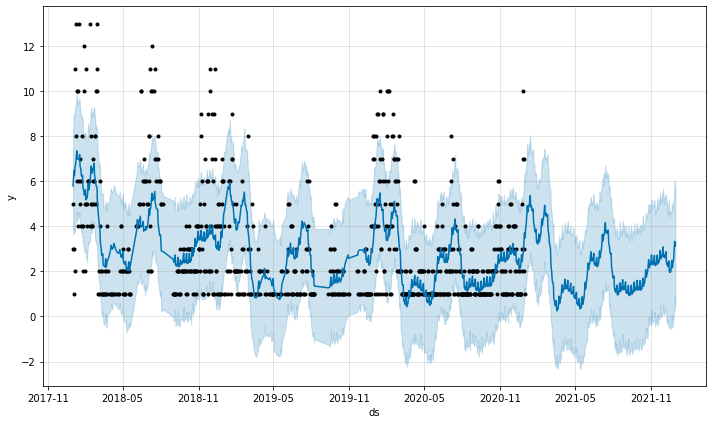

In [205]:
q7_dist_center_65, q7_dist_center_65_avg = q7_forecast(q7_grouped[q7_grouped['DistributionCenter_ID'] == 'DistributionCenter_65'])

In [206]:
print('Forecasted Average Daily Orders for Distribution Center {0}: {1}'.format(65, q7_dist_center_65_avg))
print('Forecasted Daily Orders for Distribution Center {0}:\n {1}'.format(65, q7_dist_center_65))

Forecasted Average Daily Orders for Distribution Center 65: 2.705032328105067
Forecasted Daily Orders for Distribution Center 65:
              ds      yhat
0    2018-01-01  5.792402
1    2018-01-02  6.122746
2    2018-01-03  6.477712
3    2018-01-04  6.243465
4    2018-01-05  6.371169
...         ...       ...
1183 2021-12-27  2.688158
1184 2021-12-28  2.992879
1185 2021-12-29  3.337153
1186 2021-12-30  3.107853
1187 2021-12-31  3.256492

[1188 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


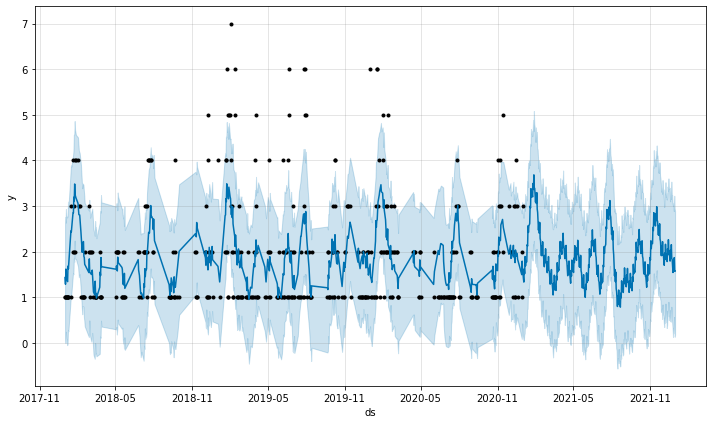

In [207]:
q7_dist_center_66, q7_dist_center_66_avg = q7_forecast(q7_grouped[q7_grouped['DistributionCenter_ID'] == 'DistributionCenter_66'])

In [208]:
print('Forecasted Average Daily Orders for Distribution Center {0}: {1}'.format(66, q7_dist_center_66_avg))
print('Forecasted Daily Orders for Distribution Center {0}:\n {1}'.format(66, q7_dist_center_66))

Forecasted Average Daily Orders for Distribution Center 66: 1.8947006149590324
Forecasted Daily Orders for Distribution Center 66:
             ds      yhat
0   2018-01-01  1.433592
1   2018-01-02  1.286603
2   2018-01-03  1.619892
3   2018-01-04  1.373443
4   2018-01-05  1.431672
..         ...       ...
773 2021-12-27  1.767628
774 2021-12-28  1.582294
775 2021-12-29  1.870108
776 2021-12-30  1.571927
777 2021-12-31  1.573249

[778 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


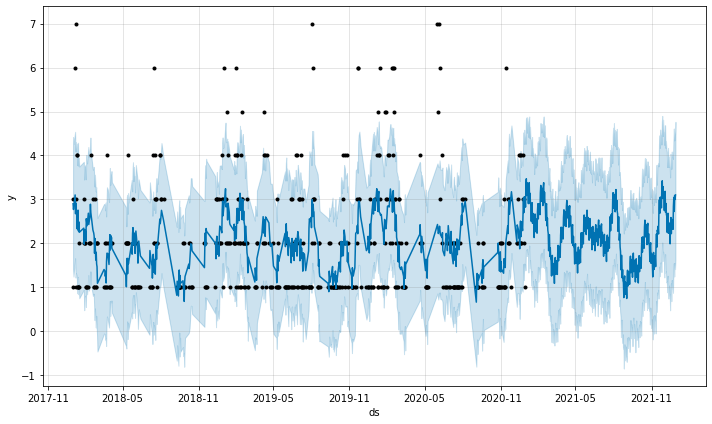

In [209]:
q7_dist_center_85, q7_dist_center_85_avg = q7_forecast(q7_grouped[q7_grouped['DistributionCenter_ID'] == 'DistributionCenter_85'])

In [210]:
print('Forecasted Average Daily Orders for Distribution Center {0}: {1}'.format(85, q7_dist_center_85_avg))
print('Forecasted Daily Orders for Distribution Center {0}:\n {1}'.format(85, q7_dist_center_85))

Forecasted Average Daily Orders for Distribution Center 85: 2.111681105063339
Forecasted Daily Orders for Distribution Center 85:
             ds      yhat
0   2018-01-01  2.900467
1   2018-01-02  2.769369
2   2018-01-06  3.100637
3   2018-01-07  2.672186
4   2018-01-08  2.916844
..         ...       ...
833 2021-12-25  3.044861
834 2021-12-26  2.724487
835 2021-12-27  3.087345
836 2021-12-28  2.998360
837 2021-12-29  3.102129

[838 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


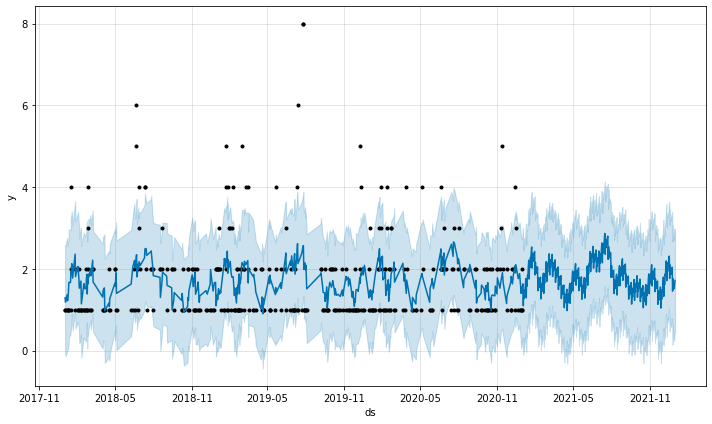

In [211]:
q7_dist_center_50, q7_dist_center_50_avg = q7_forecast(q7_grouped[q7_grouped['DistributionCenter_ID'] == 'DistributionCenter_50'])

In [212]:
print('Forecasted Average Daily Orders for Distribution Center {0}: {1}'.format(50, q7_dist_center_50_avg))
print('Forecasted Daily Orders for Distribution Center {0}:\n {1}'.format(50, q7_dist_center_50))

Forecasted Average Daily Orders for Distribution Center 50: 1.7720195417024984
Forecasted Daily Orders for Distribution Center 50:
             ds      yhat
0   2018-01-02  1.287295
1   2018-01-03  1.184991
2   2018-01-07  1.364624
3   2018-01-08  1.218020
4   2018-01-10  1.424532
..         ...       ...
707 2021-12-27  1.512729
708 2021-12-28  1.660506
709 2021-12-29  1.517326
710 2021-12-30  1.661320
711 2021-12-31  1.713908

[712 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


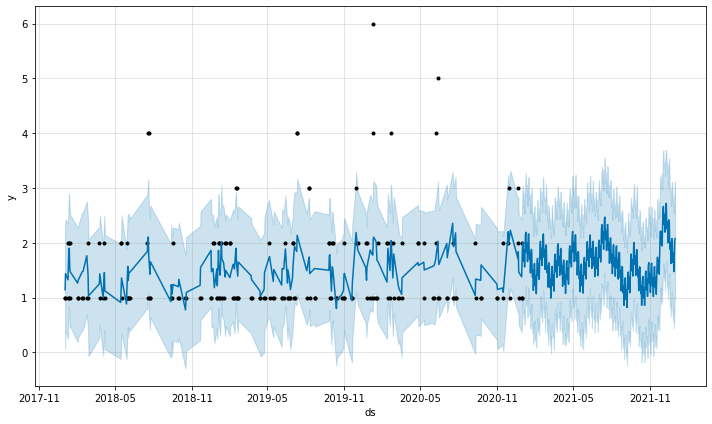

In [213]:
q7_dist_center_86, q7_dist_center_86_avg = q7_forecast(q7_grouped[q7_grouped['DistributionCenter_ID'] == 'DistributionCenter_86'])

In [214]:
print('Forecasted Average Daily Orders for Distribution Center {0}: {1}'.format(86, q7_dist_center_86_avg))
print('Forecasted Daily Orders for Distribution Center {0}:\n {1}'.format(86, q7_dist_center_86))

Forecasted Average Daily Orders for Distribution Center 86: 1.617113975210701
Forecasted Daily Orders for Distribution Center 86:
             ds      yhat
0   2018-01-02  1.144010
1   2018-01-03  1.438754
2   2018-01-09  1.326578
3   2018-01-10  1.602913
4   2018-01-11  1.870408
..         ...       ...
536 2021-12-27  1.807137
537 2021-12-28  1.475292
538 2021-12-29  1.748288
539 2021-12-30  2.025078
540 2021-12-31  2.077044

[541 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


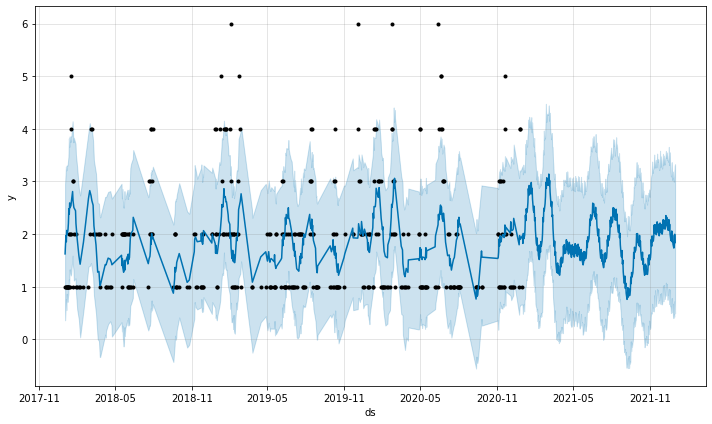

In [215]:
q7_dist_center_93, q7_dist_center_93_avg = q7_forecast(q7_grouped[q7_grouped['DistributionCenter_ID'] == 'DistributionCenter_93'])

In [216]:
print('Forecasted Average Daily Orders for Distribution Center {0}: {1}'.format(93, q7_dist_center_93_avg))
print('Forecasted Daily Orders for Distribution Center {0}:\n {1}'.format(93, q7_dist_center_93))

Forecasted Average Daily Orders for Distribution Center 93: 1.8710118493079337
Forecasted Daily Orders for Distribution Center 93:
             ds      yhat
0   2018-01-02  1.623575
1   2018-01-04  1.971509
2   2018-01-05  1.853653
3   2018-01-06  2.070251
4   2018-01-07  1.990503
..         ...       ...
727 2021-12-27  1.768018
728 2021-12-28  1.734188
729 2021-12-29  1.783140
730 2021-12-30  1.996621
731 2021-12-31  1.838141

[732 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


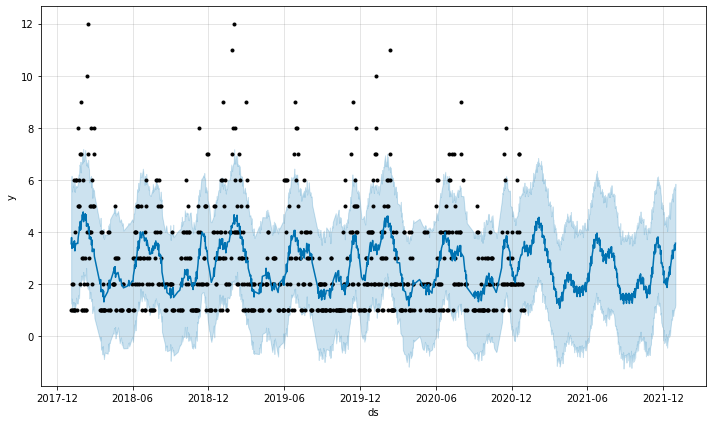

In [217]:
q7_dist_center_13, q7_dist_center_13_avg = q7_forecast(q7_grouped[q7_grouped['DistributionCenter_ID'] == 'DistributionCenter_13'])

In [218]:
print('Forecasted Average Daily Orders for Distribution Center {0}: {1}'.format(13, q7_dist_center_13_avg))
print('Forecasted Daily Orders for Distribution Center {0}:\n {1}'.format(13, q7_dist_center_13))

Forecasted Average Daily Orders for Distribution Center 13: 2.731187253656426
Forecasted Daily Orders for Distribution Center 13:
              ds      yhat
0    2018-01-04  3.551240
1    2018-01-05  3.788340
2    2018-01-06  3.373106
3    2018-01-08  3.529686
4    2018-01-09  3.515150
...         ...       ...
1088 2021-12-27  3.300267
1089 2021-12-28  3.344980
1090 2021-12-29  3.507505
1091 2021-12-30  3.302866
1092 2021-12-31  3.571623

[1093 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


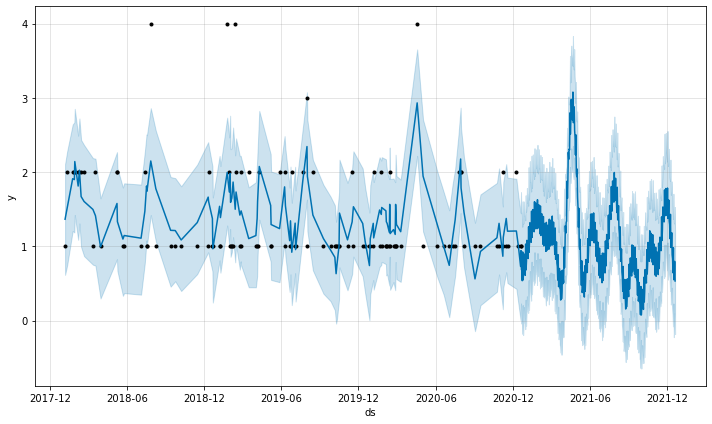

In [219]:
q7_dist_center_84, q7_dist_center_84_avg = q7_forecast(q7_grouped[q7_grouped['DistributionCenter_ID'] == 'DistributionCenter_84'])

In [220]:
print('Forecasted Average Daily Orders for Distribution Center {0}: {1}'.format(84, q7_dist_center_84_avg))
print('Forecasted Daily Orders for Distribution Center {0}:\n {1}'.format(84, q7_dist_center_84))

Forecasted Average Daily Orders for Distribution Center 84: 1.1346148743150501
Forecasted Daily Orders for Distribution Center 84:
             ds      yhat
0   2018-01-05  1.365194
1   2018-01-10  1.518096
2   2018-01-23  1.911154
3   2018-01-27  1.899055
4   2018-01-28  2.142153
..         ...       ...
475 2021-12-16  0.979941
476 2021-12-17  0.549997
477 2021-12-18  0.591811
478 2021-12-19  0.797361
479 2021-12-20  0.533066

[480 rows x 2 columns]


### 8. The weekly number of product returns forecast per warehouse


In [224]:
q8 = pd.merge(df, supply_network, how='left', left_on = 'Delivery_Zip_Code', right_on = 'Zip')

In [225]:
q8_subset = q8[q8['Order_Returned'] == 1]

In [226]:
q8_grouped = q8_subset.groupby(['Actual_Delivery_Year', 'Actual_Delivery_Week_of_Year', 'Warehouse_ID'])['OrderID'].count().reset_index(name='Count')

In [227]:
q8_weeks = q8_subset.groupby(['Actual_Delivery_Year', 'Actual_Delivery_Week_of_Year'])['Actual_Delivery_Date'].min().reset_index()

In [228]:
q8_grouped_rev2 = pd.merge(q8_grouped, q8_weeks, how='left', on = ['Actual_Delivery_Year', 'Actual_Delivery_Week_of_Year'])

In [229]:
def q8_forecast(df):
    df_temp = df[['Actual_Delivery_Date', 'Count']]

    df_model_data = df.rename(columns = {'Actual_Delivery_Date': 'ds',
                                'Count': 'y'})
 
    df_model = Prophet(yearly_seasonality=True, daily_seasonality=True)
    df_model.fit(df_model_data) 
    df_future_dates = df_model.make_future_dataframe(periods = 52, freq='w')
    df_forecast = df_model.predict(df_future_dates)

    df_model.plot(df_forecast);
    
    forecast = df_forecast[['ds', 'yhat']]
    forecast_avg = df_forecast['yhat'].mean()
    
    return forecast, forecast_avg

In [230]:
q8_grouped['Warehouse_ID'].unique()

array(['Warehouse_1', 'Warehouse_12', 'Warehouse_18', 'Warehouse_13',
       'Warehouse_15', 'Warehouse_16', 'Warehouse_17', 'Warehouse_19',
       'Warehouse_2', 'Warehouse_3', 'Warehouse_4', 'Warehouse_5'],
      dtype=object)

/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


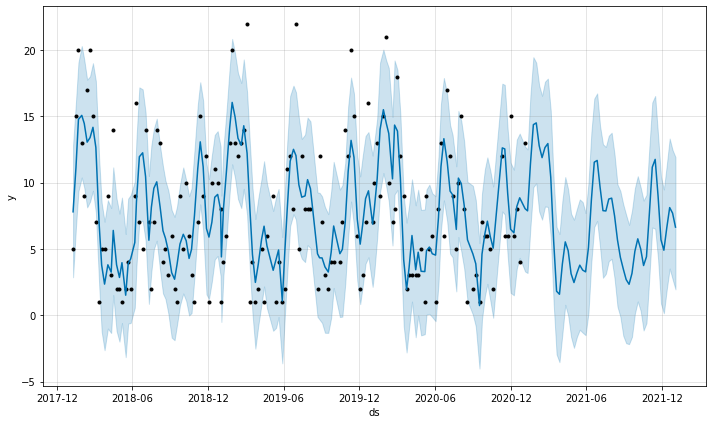

In [231]:
q8_warehouse_1, q8_warehouse_1_avg = q8_forecast(q8_grouped_rev2[q8_grouped_rev2['Warehouse_ID'] == 'Warehouse_1'])

In [232]:
print('Forecasted Average Weekly Returns for Warehouse {0}: {1}'.format(1, q8_warehouse_1_avg))
print('Forecasted Weekly Returns for Warehouse {0}:\n {1}'.format(1, q8_warehouse_1))

Forecasted Average Weekly Returns for Warehouse 1: 7.600397980599159
Forecasted Weekly Returns for Warehouse 1:
             ds       yhat
0   2018-01-09   7.802401
1   2018-01-16  11.150194
2   2018-01-22  14.779457
3   2018-01-30  15.080991
4   2018-02-05  14.468727
..         ...        ...
198 2021-12-05   4.904994
199 2021-12-12   6.598227
200 2021-12-19   8.121159
201 2021-12-26   7.702112
202 2022-01-02   6.647736

[203 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


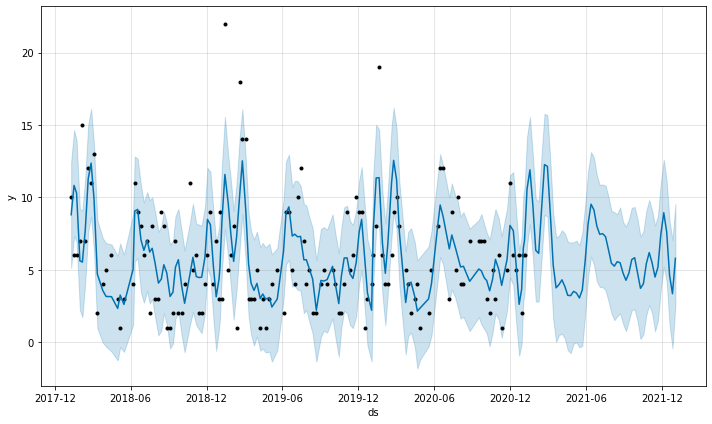

In [233]:
q8_warehouse_12, q8_warehouse_12_avg = q8_forecast(q8_grouped_rev2[q8_grouped_rev2['Warehouse_ID'] == 'Warehouse_12'])

In [234]:
print('Forecasted Average Weekly Returns for Warehouse {0}: {1}'.format(12, q8_warehouse_12_avg))
print('Forecasted Weekly Returns for Warehouse {0}:\n {1}'.format(12, q8_warehouse_12))

Forecasted Average Weekly Returns for Warehouse 12: 5.960743183668299
Forecasted Weekly Returns for Warehouse 12:
             ds       yhat
0   2018-01-09   8.801479
1   2018-01-16  10.827342
2   2018-01-22  10.302930
3   2018-01-30   5.619295
4   2018-02-05   5.531531
..         ...        ...
187 2021-12-05   8.941796
188 2021-12-12   7.629822
189 2021-12-19   4.621478
190 2021-12-26   3.346775
191 2022-01-02   5.792330

[192 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


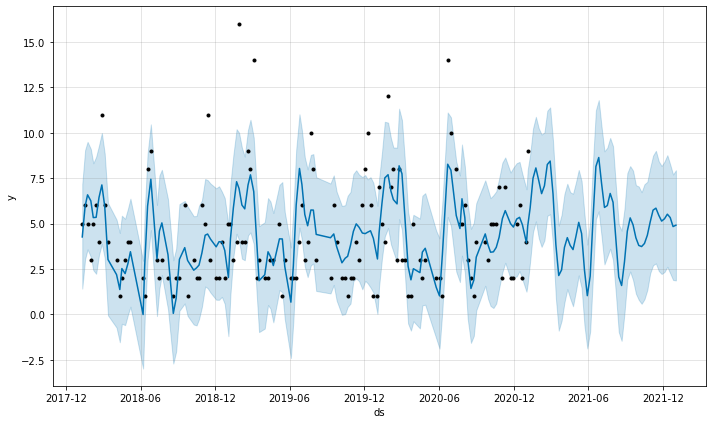

In [235]:
q8_warehouse_13, q8_warehouse_13_avg = q8_forecast(q8_grouped_rev2[q8_grouped_rev2['Warehouse_ID'] == 'Warehouse_13'])

In [236]:
print('Forecasted Average Weekly Returns for Warehouse {0}: {1}'.format(13, q8_warehouse_13_avg))
print('Forecasted Weekly Returns for Warehouse {0}:\n {1}'.format(13, q8_warehouse_13))

Forecasted Average Weekly Returns for Warehouse 13: 4.54595779157334
Forecasted Weekly Returns for Warehouse 13:
             ds      yhat
0   2018-01-09  4.265583
1   2018-01-16  5.955653
2   2018-01-22  6.582422
3   2018-01-30  6.250167
4   2018-02-05  5.330304
..         ...       ...
176 2021-12-05  5.264634
177 2021-12-12  5.516967
178 2021-12-19  5.332698
179 2021-12-26  4.836481
180 2022-01-02  4.911666

[181 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


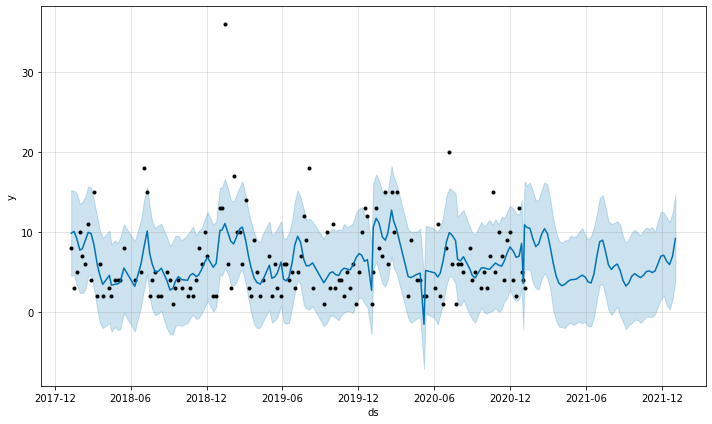

In [237]:
q8_warehouse_16, q8_warehouse_16_avg = q8_forecast(q8_grouped_rev2[q8_grouped_rev2['Warehouse_ID'] == 'Warehouse_16'])

In [238]:
print('Forecasted Average Weekly Returns for Warehouse {0}: {1}'.format(16, q8_warehouse_16_avg))
print('Forecasted Weekly Returns for Warehouse {0}:\n {1}'.format(16, q8_warehouse_16))

Forecasted Average Weekly Returns for Warehouse 16: 6.2857062493243525
Forecasted Weekly Returns for Warehouse 16:
             ds       yhat
0   2018-01-09   9.838377
1   2018-01-16  10.059563
2   2018-01-22   9.265889
3   2018-01-30   7.724891
4   2018-02-05   7.921818
..         ...        ...
185 2021-12-05   7.089082
186 2021-12-12   6.348656
187 2021-12-19   5.925273
188 2021-12-26   6.948818
189 2022-01-02   9.168063

[190 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


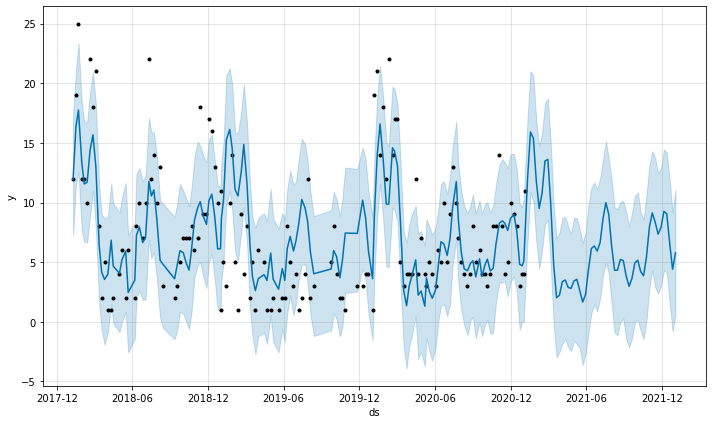

In [239]:
q8_warehouse_18, q8_warehouse_18_avg = q8_forecast(q8_grouped_rev2[q8_grouped_rev2['Warehouse_ID'] == 'Warehouse_18'])

In [240]:
print('Forecasted Average Weekly Returns for Warehouse {0}: {1}'.format(18, q8_warehouse_18_avg))
print('Forecasted Weekly Returns for Warehouse {0}:\n {1}'.format(18, q8_warehouse_18))

Forecasted Average Weekly Returns for Warehouse 18: 7.123649123907544
Forecasted Weekly Returns for Warehouse 18:
             ds       yhat
0   2018-01-09  11.943425
1   2018-01-16  16.387516
2   2018-01-22  17.752822
3   2018-01-30  13.365896
4   2018-02-05  11.563744
..         ...        ...
190 2021-12-05   9.262348
191 2021-12-12   9.062853
192 2021-12-19   6.584013
193 2021-12-26   4.404584
194 2022-01-02   5.788081

[195 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


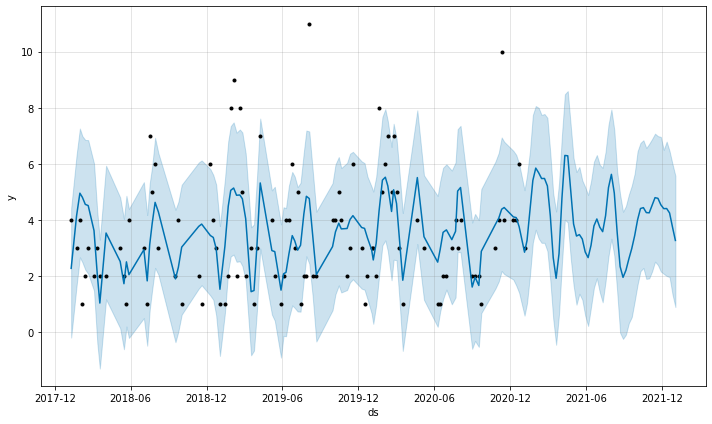

In [241]:
q8_warehouse_19, q8_warehouse_19_avg = q8_forecast(q8_grouped_rev2[q8_grouped_rev2['Warehouse_ID'] == 'Warehouse_19'])

In [242]:
print('Forecasted Average Weekly Returns for Warehouse {0}: {1}'.format(19, q8_warehouse_19_avg))
print('Forecasted Weekly Returns for Warehouse {0}:\n {1}'.format(19, q8_warehouse_19))

Forecasted Average Weekly Returns for Warehouse 19: 3.6832310845448206
Forecasted Weekly Returns for Warehouse 19:
             ds      yhat
0   2018-01-09  2.272480
1   2018-01-22  4.145686
2   2018-01-30  4.953596
3   2018-02-05  4.806546
4   2018-02-12  4.554377
..         ...       ...
147 2021-12-05  4.401751
148 2021-12-12  4.406324
149 2021-12-19  4.247979
150 2021-12-26  3.746953
151 2022-01-02  3.268086

[152 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


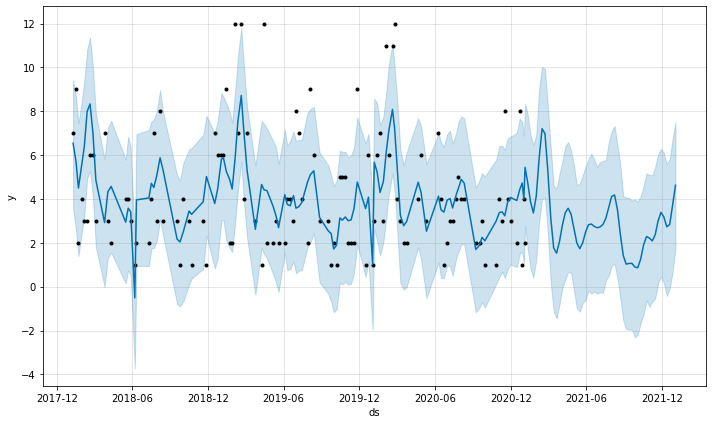

In [243]:
q8_warehouse_2, q8_warehouse_2_avg = q8_forecast(q8_grouped_rev2[q8_grouped_rev2['Warehouse_ID'] == 'Warehouse_2'])

In [244]:
print('Forecasted Average Weekly Returns for Warehouse {0}: {1}'.format(2, q8_warehouse_2_avg))
print('Forecasted Weekly Returns for Warehouse {0}:\n {1}'.format(2, q8_warehouse_2))

Forecasted Average Weekly Returns for Warehouse 2: 3.826671340097414
Forecasted Weekly Returns for Warehouse 2:
             ds      yhat
0   2018-01-09  6.546234
1   2018-01-16  5.717799
2   2018-01-22  4.502629
3   2018-01-30  5.560131
4   2018-02-05  6.370383
..         ...       ...
161 2021-12-05  3.176922
162 2021-12-12  2.733086
163 2021-12-19  2.836963
164 2021-12-26  3.706455
165 2022-01-02  4.625769

[166 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


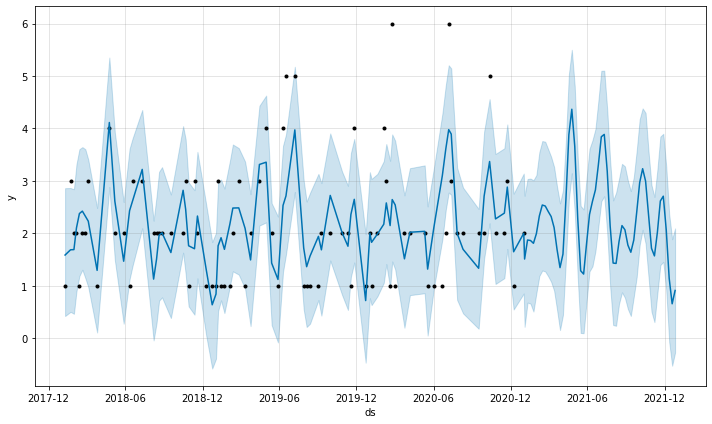

In [245]:
q8_warehouse_5, q8_warehouse_5_avg = q8_forecast(q8_grouped_rev2[q8_grouped_rev2['Warehouse_ID'] == 'Warehouse_5'])

In [246]:
print('Forecasted Average Weekly Returns for Warehouse {0}: {1}'.format(5, q8_warehouse_5_avg))
print('Forecasted Weekly Returns for Warehouse {0}:\n {1}'.format(5, q8_warehouse_5))

Forecasted Average Weekly Returns for Warehouse 5: 2.194476555287825
Forecasted Weekly Returns for Warehouse 5:
             ds      yhat
0   2018-01-09  1.585219
1   2018-01-22  1.685411
2   2018-01-30  1.688971
3   2018-02-05  2.102145
4   2018-02-12  2.376821
..         ...       ...
128 2021-11-28  2.707984
129 2021-12-05  2.063873
130 2021-12-12  1.139490
131 2021-12-19  0.655131
132 2021-12-26  0.909294

[133 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


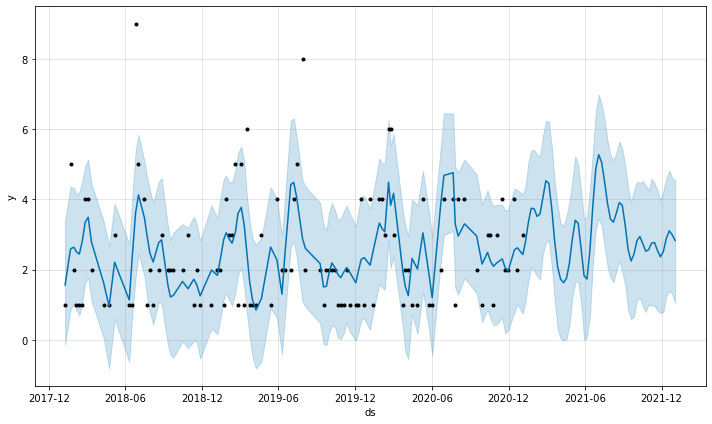

In [247]:
q8_warehouse_15, q8_warehouse_15_avg = q8_forecast(q8_grouped_rev2[q8_grouped_rev2['Warehouse_ID'] == 'Warehouse_15'])

In [248]:
print('Forecasted Average Weekly Returns for Warehouse {0}: {1}'.format(15, q8_warehouse_15_avg))
print('Forecasted Weekly Returns for Warehouse {0}:\n {1}'.format(15, q8_warehouse_15))

Forecasted Average Weekly Returns for Warehouse 15: 2.6844754726380904
Forecasted Weekly Returns for Warehouse 15:
             ds      yhat
0   2018-01-09  1.563134
1   2018-01-22  2.587443
2   2018-01-30  2.640288
3   2018-02-05  2.508590
4   2018-02-12  2.442610
..         ...       ...
151 2021-12-05  2.513988
152 2021-12-12  2.886523
153 2021-12-19  3.104184
154 2021-12-26  2.994228
155 2022-01-02  2.831801

[156 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


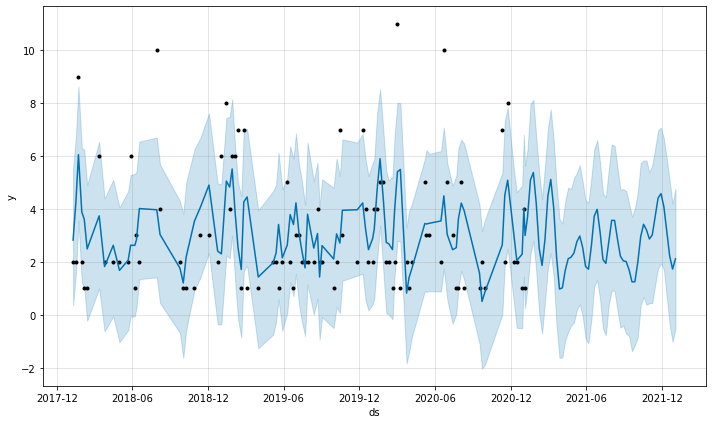

In [249]:
q8_warehouse_17, q8_warehouse_17_avg = q8_forecast(q8_grouped_rev2[q8_grouped_rev2['Warehouse_ID'] == 'Warehouse_17'])

In [250]:
print('Forecasted Average Weekly Returns for Warehouse {0}: {1}'.format(17, q8_warehouse_17_avg))
print('Forecasted Weekly Returns for Warehouse {0}:\n {1}'.format(17, q8_warehouse_17))

Forecasted Average Weekly Returns for Warehouse 17: 3.04245181806621
Forecasted Weekly Returns for Warehouse 17:
             ds      yhat
0   2018-01-09  2.824859
1   2018-01-16  4.300605
2   2018-01-22  6.052479
3   2018-01-30  3.885940
4   2018-02-05  3.613552
..         ...       ...
141 2021-12-05  4.084058
142 2021-12-12  3.166168
143 2021-12-19  2.225072
144 2021-12-26  1.731888
145 2022-01-02  2.117145

[146 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


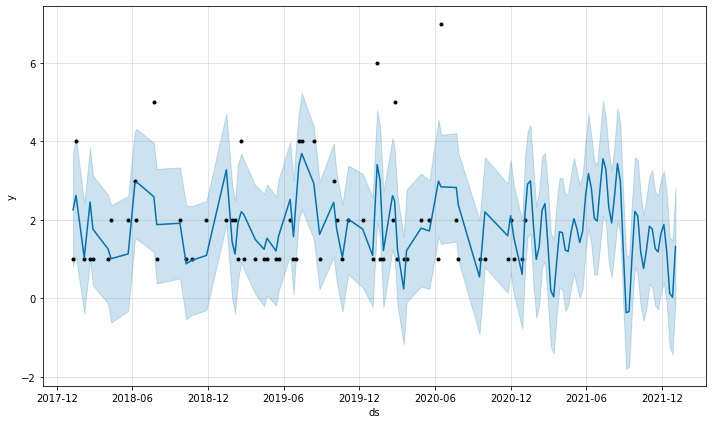

In [251]:
q8_warehouse_3, q8_warehouse_3_avg = q8_forecast(q8_grouped_rev2[q8_grouped_rev2['Warehouse_ID'] == 'Warehouse_3'])

In [252]:
print('Forecasted Average Weekly Returns for Warehouse {0}: {1}'.format(3, q8_warehouse_3_avg))
print('Forecasted Weekly Returns for Warehouse {0}:\n {1}'.format(3, q8_warehouse_3))

Forecasted Average Weekly Returns for Warehouse 3: 1.8194382989965623
Forecasted Weekly Returns for Warehouse 3:
             ds      yhat
0   2018-01-09  2.255009
1   2018-01-16  2.624617
2   2018-02-05  1.037948
3   2018-02-19  2.455756
4   2018-02-26  1.761131
..         ...       ...
108 2021-12-05  1.882398
109 2021-12-12  1.180081
110 2021-12-19  0.127410
111 2021-12-26  0.029059
112 2022-01-02  1.323786

[113 rows x 2 columns]


/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


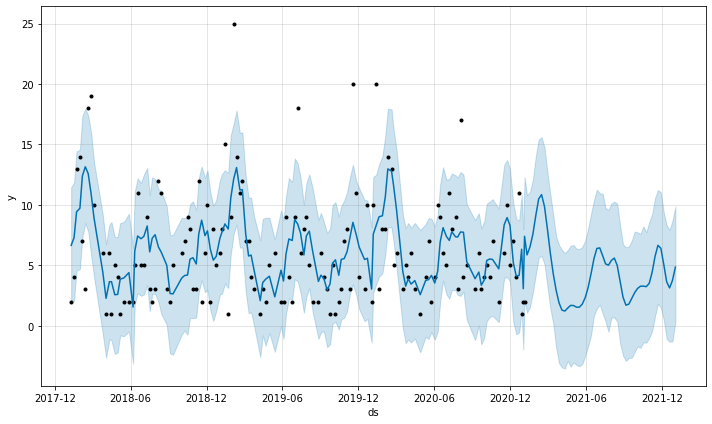

In [253]:
q8_warehouse_4, q8_warehouse_4_avg = q8_forecast(q8_grouped_rev2[q8_grouped_rev2['Warehouse_ID'] == 'Warehouse_4'])

In [254]:
print('Forecasted Average Weekly Returns for Warehouse {0}: {1}'.format(4, q8_warehouse_4_avg))
print('Forecasted Weekly Returns for Warehouse {0}:\n {1}'.format(4, q8_warehouse_4))

Forecasted Average Weekly Returns for Warehouse 4: 5.803711486779431
Forecasted Weekly Returns for Warehouse 4:
             ds       yhat
0   2018-01-09   6.644772
1   2018-01-16   7.288205
2   2018-01-22   9.429732
3   2018-01-30   9.714525
4   2018-02-05  12.392197
..         ...        ...
187 2021-12-05   5.078959
188 2021-12-12   3.638301
189 2021-12-19   3.128399
190 2021-12-26   3.752832
191 2022-01-02   4.848959

[192 rows x 2 columns]


### 9. Whether the number of delayed deliveries per zip-code positively correlated to the number of returned purchases/products.    

In [255]:
# Determine the # of returns and delayed deliveries per zip-code

q9_returns = df[df['Order_Returned'] == 1].groupby(['Delivery_Zip_Code'])['Order_Returned'].count().reset_index()
q9_on_time = df[df['Order_Delivered_on_Time'] == 0].groupby(['Delivery_Zip_Code'])['Order_Delivered_on_Time'].count().reset_index()

In [256]:
q9 = pd.merge(q9_returns, q9_on_time, how='inner', on='Delivery_Zip_Code')

In [257]:
# We can see there is a high correlation of .9866 indicating that the same issue may effect both the number of returned products and delayed products

q9[['Order_Returned', 'Order_Delivered_on_Time']].corr()

Order_Returned  Order_Delivered_on_Time
Order_Returned                   1.0000                   0.9866
Order_Delivered_on_Time          0.9866                   1.0000

### 10. The busiest zip code (counting both deliveries and purchase returns)

In [258]:
# Ensure we are double counting returns and purchases. 
# I create the # of orders and returns for each zip code on a daily basis and then forecast out for a year. I then
# Use the forecast to determine the busiest zip code over the course of a year.
q10_purchases = df.groupby(['Delivery_Zip_Code', 'Actual_Delivery_Date'])['Order_ID'].count().reset_index(name='order_count')
q10_returns = df[df['Order_Returned'] == 1].groupby(['Delivery_Zip_Code', 'Actual_Delivery_Date'])['Order_ID'].count().reset_index(name='return_count')
q10 = pd.merge(q10_purchases, q10_returns, how='inner', on=['Delivery_Zip_Code', 'Actual_Delivery_Date'])
q10['count'] = q10['order_count'] + q10['return_count']

In [259]:
q10

Delivery_Zip_Code Actual_Delivery_Date  order_count  return_count  count
0                 10048           2018-01-14            1             1      2
1                 10048           2018-01-23            3             2      5
2                 10048           2018-01-28            2             1      3
3                 10048           2018-01-30            1             1      2
4                 10048           2018-02-04            3             2      5
...                 ...                  ...          ...           ...    ...
4801              90774           2020-12-15            1             1      2
4802              90774           2020-12-27            1             1      2
4803              90774           2021-01-04            1             1      2
4804              90774           2021-01-05            2             2      4
4805              90774           2021-01-06            1             1      2

[4806 rows x 5 columns]

In [260]:
forecasted_values = pd.DataFrame()

for i in q10['Delivery_Zip_Code'].unique():
    
    q10_sub = q10[q10['Delivery_Zip_Code'] == i]
    data = q10_sub[['Actual_Delivery_Date', 'count']]
    model_data = data.rename(columns = {'Actual_Delivery_Date': 'ds',
                                'count': 'y'})
 
    q10_model = Prophet(yearly_seasonality=True, daily_seasonality=True)
    q10_model.fit(model_data) 
    q10_future_dates = q10_model.make_future_dataframe(periods = 365, freq='d')
    q10_forecast = q10_model.predict(q10_future_dates)
    q10_forecast['Zip'] = i
    
    forecasted_values = forecasted_values.append(q10_forecast[['ds', 'yhat', 'Zip']])

/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_29412/3985011006.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasted_values = forec

In [261]:
forecasted_values 

ds      yhat    Zip
0   2018-01-14  3.061493  10048
1   2018-01-23  3.789256  10048
2   2018-01-28  3.569982  10048
3   2018-01-30  3.780569  10048
4   2018-02-04  3.279536  10048
..         ...       ...    ...
484 2022-01-02  2.405352  90774
485 2022-01-03  2.873660  90774
486 2022-01-04  2.835604  90774
487 2022-01-05  2.826978  90774
488 2022-01-06  2.416851  90774

[27436 rows x 3 columns]

In [262]:
q10_results = forecasted_values.groupby(['Zip'])['yhat'].sum().reset_index(name='Total')

In [263]:
q10_results

Zip         Total
0   10048   1768.633724
1   10110   1498.679998
2   10121   1118.201104
3   10123   1643.736708
4   10168   1522.896121
5   10177   1656.676498
6   30306   1922.973098
7   30328 -43211.144833
8   30336   -169.328365
9   30365  -4819.052162
10  30369   2331.467825
11  30381    410.410706
12  30386   1041.231230
13  31191  -5706.251650
14  31192    848.452653
15  33111   1362.081811
16  33127   1329.884716
17  33152   1364.657028
18  33153   1203.871745
19  33175   1349.909390
20  33187   1197.900522
21  33242   1060.420870
22  33247    813.477219
23  33269    923.044120
24  33299   1704.847356
25  37206   1061.965860
26  37209   1694.956135
27  37210   1127.426934
28  37213   1323.948364
29  37227   2629.203417
30  37228   1080.050397
31  37237    770.248167
32  37240    971.791555
33  37250   1321.019018
34  39901   -650.852188
35  60535   1440.814107
36  60609   1459.490652
37  60615   1789.261256
38  60622   1522.178029
39  60623   1824.484793
40  60660   1471.323248
41  60663   1568.523097
42  75210   1022.196498
43  75214   1880.331860
44  75215   2396.239949
45  75231   1525.708113
46  75246   -594.956452
47  75251   1012.341080
48  75363    754.108538
49  75368    455.546436
50  75373   1222.421309
51  75379    988.322667
52  75382   1410.287422
53  90032   1504.396068
54  90051   1234.437163
55  90060   1310.441413
56  90062   1535.099912
57  90076   1329.462752
58  90077   1383.323968
59  90080   1224.242830
60  90097   1562.768021
61  90774   1542.284198

In [264]:
# Zip code 37227 is the busiest Zip code over the couse of the forecasted upcoming year.
q10_results.sort_values('Total', ascending=False)

Zip         Total
29  37227   2629.203417
44  75215   2396.239949
10  30369   2331.467825
6   30306   1922.973098
43  75214   1880.331860
39  60623   1824.484793
37  60615   1789.261256
0   10048   1768.633724
24  33299   1704.847356
26  37209   1694.956135
5   10177   1656.676498
3   10123   1643.736708
41  60663   1568.523097
60  90097   1562.768021
61  90774   1542.284198
56  90062   1535.099912
45  75231   1525.708113
4   10168   1522.896121
38  60622   1522.178029
53  90032   1504.396068
1   10110   1498.679998
40  60660   1471.323248
36  60609   1459.490652
35  60535   1440.814107
52  75382   1410.287422
58  90077   1383.323968
17  33152   1364.657028
15  33111   1362.081811
19  33175   1349.909390
16  33127   1329.884716
57  90076   1329.462752
28  37213   1323.948364
33  37250   1321.019018
55  90060   1310.441413
54  90051   1234.437163
59  90080   1224.242830
50  75373   1222.421309
18  33153   1203.871745
20  33187   1197.900522
27  37210   1127.426934
2   10121   1118.201104
30  37228   1080.050397
25  37206   1061.965860
21  33242   1060.420870
12  30386   1041.231230
42  75210   1022.196498
47  75251   1012.341080
51  75379    988.322667
32  37240    971.791555
23  33269    923.044120
14  31192    848.452653
22  33247    813.477219
31  37237    770.248167
48  75363    754.108538
49  75368    455.546436
11  30381    410.410706
8   30336   -169.328365
46  75246   -594.956452
34  39901   -650.852188
9   30365  -4819.052162
13  31191  -5706.251650
7   30328 -43211.144833

### 11. The most selling product in every zip-code

In [265]:
q11 = df[['Delivery_Zip_Code', 'Product_Name']].groupby(['Delivery_Zip_Code', 'Product_Name'])['Product_Name'].count().reset_index(name='Count')

In [266]:
q11_max = q11.groupby(['Delivery_Zip_Code'])['Count'].max().reset_index()
q11_result = pd.merge(q11, q11_max, how='inner', on=['Delivery_Zip_Code', 'Count'])

In [267]:
pd.options.display.max_rows = 70

In [268]:
q11_result

Delivery_Zip_Code   Product_Name  Count
0               10048   Fitbit small     75
1               10110   Fitbit small     71
2               10121   Fitbit large     69
3               10123   Fitbit small     81
4               10168   Fitbit large     76
5               10177   Fitbit small     77
6               30306   Fitbit small      6
7               30328   Fitbit small     14
8               30328           Sony     14
9               30336   Fitbit large     16
10              30365           Sony      7
11              30369   Fitbit small     13
12              30381   Fitbit large     24
13              30386   Fitbit small     26
14              31191   Fitbit large      5
15              31191  Harman Kardon      5
16              31191           Sony      5
17              31192   Fitbit large     12
18              33111   Fitbit small     45
19              33127   Fitbit small     56
20              33152   Fitbit large     59
21              33153   Fitbit small     64
22              33175   Fitbit large     64
23              33187   Fitbit large     56
24              33242   Fitbit small     59
25              33247   Fitbit small     37
26              33269   Fitbit large     45
27              33299   Fitbit large     56
28              33299   Fitbit small     56
29              37206   Fitbit large     36
30              37209   Fitbit large     32
31              37210   Fitbit small     32
32              37213   Fitbit small     36
33              37227   Fitbit large     27
34              37228   Fitbit large     28
35              37237   Fitbit large     23
36              37240   Fitbit small     32
37              37250   Fitbit large     35
38              39901   Fitbit large      8
39              60535           Sony     48
40              60609   Fitbit large     66
41              60615   Fitbit small     88
42              60622   Fitbit large     88
43              60623   Fitbit small     92
44              60660   Fitbit large     87
45              60663   Fitbit large     97
46              75210   Fitbit large     30
47              75214   Fitbit large     30
48              75214   Fitbit small     30
49              75215   Fitbit large    272
50              75231   Fitbit large     31
51              75231   Fitbit small     31
52              75246           Sony     26
53              75251   Fitbit small     30
54              75363   Fitbit small     30
55              75368   Fitbit large     37
56              75373   Fitbit large     32
57              75379   Fitbit small     30
58              75382   Fitbit small     32
59              90032   Fitbit small     75
60              90051   Fitbit small     52
61              90060   Fitbit large     75
62              90062   Fitbit large     77
63              90076   Fitbit large     72
64              90077   Fitbit large     52
65              90080   Fitbit large     60
66              90097   Fitbit small     75
67              90774   Fitbit small     72

### 12. Analyze whether the sales of the Electronics department  and  the Clothing department have similar seasonal patterns

In [269]:
# Determine if the past sales for the Electronics department and Clothing department have similar seasonal patters
# The dataset has neither so I choose tv and fitness as the two closest categories

q12_electronics = df[df['Category'] == 'tv'].groupby(['Order_Date'])['OrderID'].count().reset_index(name='electronic_counts')
q12_clothing = df[df['Category'] == 'fitness'].groupby(['Order_Date'])['OrderID'].count().reset_index(name='clothing_counts')
q12 = pd.merge(q12_electronics, q12_clothing, how='outer', on='Order_Date')

In [270]:
q12['electronic_counts'] = q12['electronic_counts'].fillna(0)
q12['clothing_counts'] = q12['clothing_counts'].fillna(0)
q12.sort_values('Order_Date', inplace=True, ascending=True)

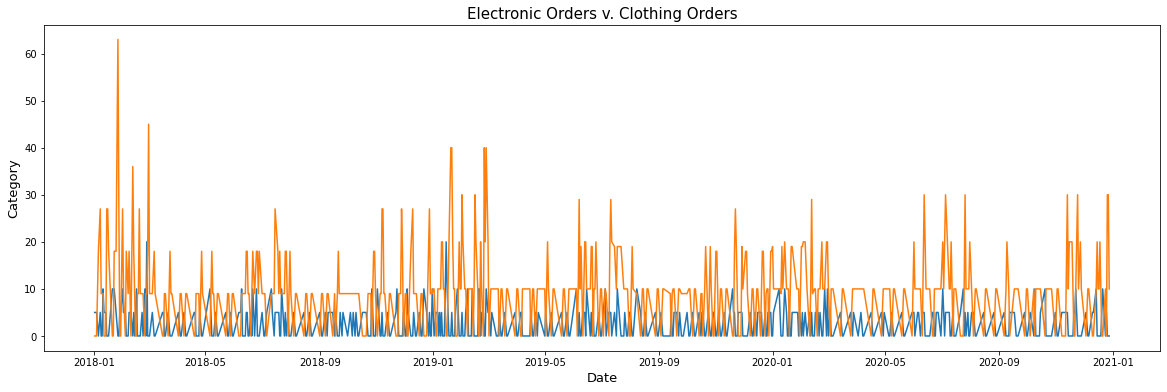

In [271]:
# We can see that Clothing follows some of the same seasonality of Electronic orders since they have spikes at similar times.

plt.subplots(figsize=(20, 6))

plt.plot(q12['Order_Date'],q12['electronic_counts'])
plt.plot(q12['Order_Date'],q12['clothing_counts'])

plt.title("Electronic Orders v. Clothing Orders",fontsize=15)
plt.xlabel("Date",fontsize=13)
plt.ylabel("Category",fontsize=13)
plt.show()

### 13. Product purchases seasonality through the year; for example, Back-to-School, Christmas, Superbowl, Weather, etc.

In [272]:
q13 = df.groupby(['Order_Date'])['OrderID'].count().reset_index(name='counts')
q13.sort_values('Order_Date', inplace=True, ascending=True)

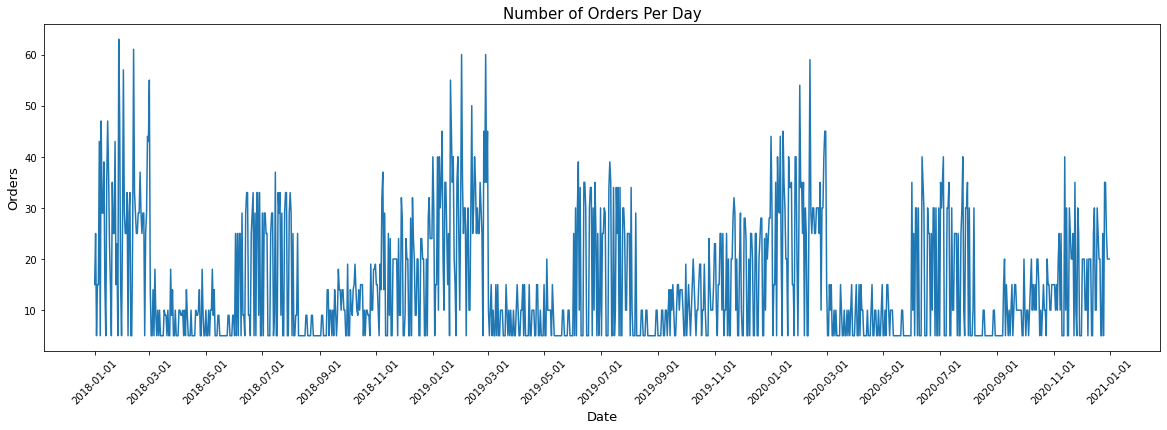

In [273]:
# There appears to be spikes around christmas and then the first of the year through the superbowl. Duringthe spring it has low orders before spiking during the summer months,
# June through August. 

plt.subplots(figsize=(20, 6))

plt.plot(q13['Order_Date'], q13['counts'])

plt.title("Number of Orders Per Day",fontsize=15)
plt.xlabel("Date",fontsize=13)
plt.ylabel("Orders",fontsize=13)
plt.xticks(['2018-01-01','2018-03-01','2018-05-01','2018-07-01','2018-09-01','2018-11-01',
            '2019-01-01','2019-03-01','2019-05-01','2019-07-01','2019-09-01','2019-11-01', 
            '2020-01-01','2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01',
            '2021-01-01'], 
           ['2018-01-01','2018-03-01','2018-05-01','2018-07-01','2018-09-01','2018-11-01',
            '2019-01-01','2019-03-01','2019-05-01','2019-07-01','2019-09-01','2019-11-01', 
            '2020-01-01','2020-03-01','2020-05-01','2020-07-01','2020-09-01','2020-11-01',
            '2021-01-01'], 
           rotation=45)
plt.show()

### 14. Build time series analysis model for product X (specify product)  in zip-code Y (specify zip code) to forecast daily sales revenue

In [274]:
# We should use PurchaseLog since the transaction .csv file does not include the price information. However, there is only a single purchase date in PurchaseLog
# so we cannot build a time series model. Thus I use the transaction.csv file and use counts rather than sales.

# I forecast the daily sale count for Fitbit small for every zip code since it is the top selling item. I forecast the next two months since the farther you forecast
# from the historical data, the less accurate the forecast becomes.
q14 = df[df['Product_Name'] == "Fitbit small"].groupby(['Delivery_Zip_Code', 'Order_Date'])['OrderID'].count().reset_index(name='count')


In [275]:
q14_forecasted_values = pd.DataFrame()

for i in q14['Delivery_Zip_Code'].unique():
    
    q14_sub = q14[q14['Delivery_Zip_Code'] == i]
    q14_data = q14_sub[['Order_Date', 'count']]
    q14_model_data = q14_data.rename(columns = {'Order_Date': 'ds',
                                'count': 'y'})
 
    q14_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
    q14_model.fit(q14_model_data) 
    q14_future_dates = q14_model.make_future_dataframe(periods = 60, freq='d')
    q14_forecast = q14_model.predict(q14_future_dates)
    q14_forecast['Zip'] = i
    
    q14_forecasted_values = q14_forecasted_values.append(q14_forecast[['ds', 'yhat', 'Zip']])

/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jhancuch/miniconda3/envs/stan/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_29412/1529759525.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  q14_forecasted_values = q

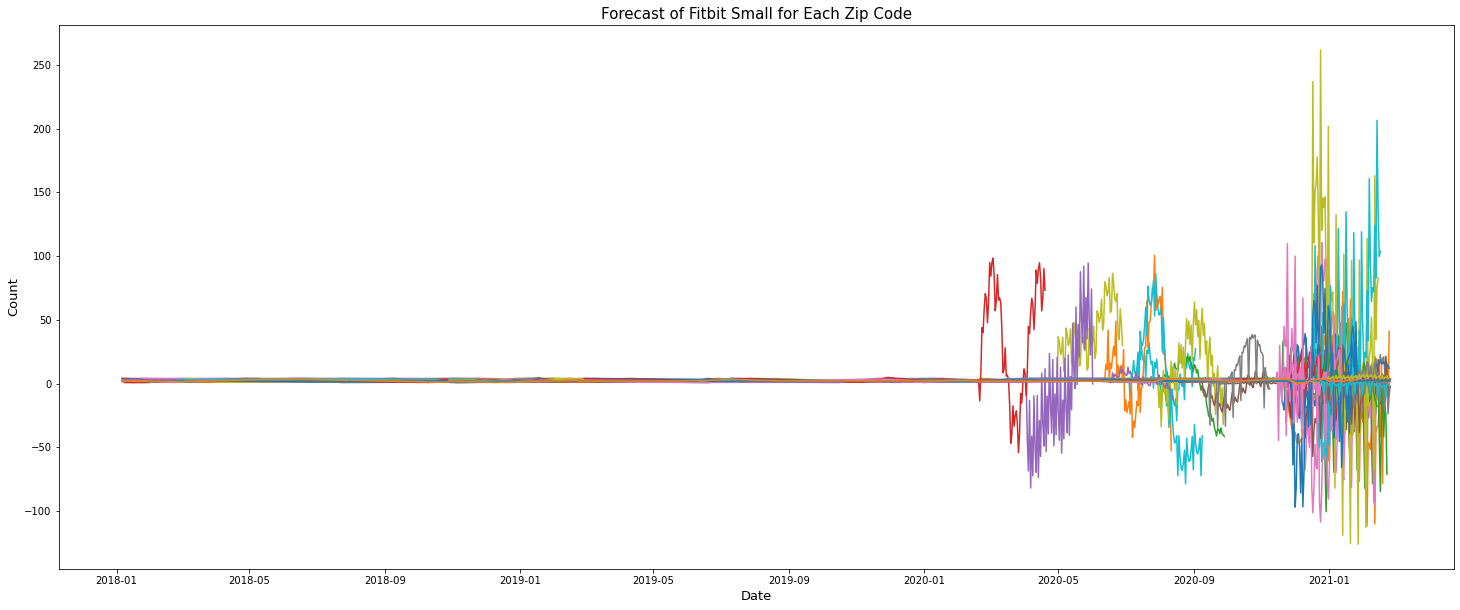

In [276]:
# Below is the graph of forecasted sale counts of fitbits for each zip code. The forecast starts at 2020-11-27. We can see the data generated shows very few purchases across all
# zip codes before large spikes of purchases start around 2020-03. This behavior carries through to the prediction where we see large spikes in purchases before crashing
# back to zero.

plt.subplots(figsize=(25, 10))
for i in q14_forecasted_values['Zip'].unique():    
    temp = q14_forecasted_values[q14_forecasted_values['Zip'] == i]
    plt.plot(temp['ds'], temp['yhat'])

plt.title("Forecast of Fitbit Small for Each Zip Code",fontsize=15)
plt.xlabel("Date",fontsize=13)
plt.ylabel("Count",fontsize=13)

plt.show()